# Supervised learning

Supervised learning aims to predict labels of data using annotated examples. Supervised algorithms learn patterns on "tagged" data for later predicting the outcome of data which the model has not seen before. 

There are two branches in supervised learning:


*   **Classification:** learns and predicts discrete labels on the data (e.g. Diabetic/Healthy, Dead cell/Live cell...)  
*   **Regression:** predicts a continuous value based on the a set of explanatory variables (e.g. weight based on the height or age based on methylation pattern).

Two important concepts in supervised learning are **response or dependent variable** and the **predictive or independent variables**. Supervised models aim to predict the response variable using the values from the predictor variables.



Let's look at examples:

The iris dataset contains information about 3 species of plants.

In [6]:
# import packages
import numpy as np
import pandas as pd
from sklearn import datasets

# load dataset
iris_dataset = datasets.load_iris()

# create data frame with predictive and variables
iris_table = pd.DataFrame(data = iris_dataset['data'], 
                          columns = iris_dataset['feature_names'])

# add response variable to the table
iris_table['species'] = pd.Categorical.from_codes(iris_dataset.target, iris_dataset.target_names)

# show first five rows of the dataframe
iris_table.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Another example is the diabetes dataset.

In [7]:
# load dataset
diabetes_dataset = datasets.load_diabetes()

# create data frame with predictive variables
diabetes_table = pd.DataFrame(data = diabetes_dataset['data'],
                              columns = diabetes_dataset['feature_names'])

# add response variable to the table
diabetes_table['disease_progression'] = pd.Series(data = diabetes_dataset['target'])

# show first five rows of the dataframe
diabetes_table.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


# Regression

Regression algorithms learn the relationship between the predictor and the response variable. The output is a continuous value. 



## Simple linear regression

Simple linear regression tries to find the linear relationship between one predictor variable and the response variable. In other words it tries to find the line which best fits the data. It follows the formula:

<br>

 $$ 
  \hat y = \beta_0 + \beta_1  x 
 $$

<br>

* $\hat y$ = predicted value
* $x$ = predictor variable
* $\beta_1$ = model coefficient (slope of the line in simple linear regression)
* $\beta_0$ = bias term (intercept in simple linear regression)

Let's see a simple example with the iris dataset:



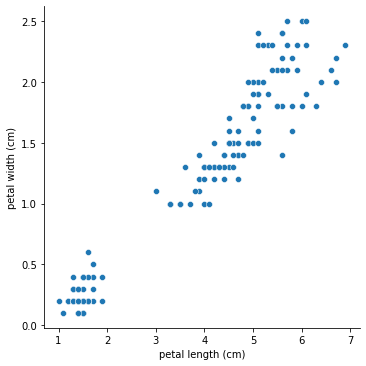

In [8]:
import seaborn as sns
%matplotlib inline

# plot the petal width v.s. the petal length
sns.relplot(data = iris_table,
            x = iris_table.columns[2], y = iris_table.columns[3])

<br>

Fit a linear regression model to the data.

In [11]:
from sklearn import linear_model

# create new arrays for the predictive and response variables 
# It is important to add an additional dimension to our numpy array to fit the model
pet_wid = iris_dataset['data'][:, np.newaxis, 3]
pet_len = iris_dataset['data'][:, np.newaxis, 2]

pet_wid[1:10]


array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1]])

In [14]:
# create a linear regression object
regres_iris = linear_model.LinearRegression()

# fit linear regression model to the data
regres_iris.fit(pet_len, pet_wid)

# extract slope 
m = float(regres_iris.coef_)

# extract intercept
n = float(regres_iris.intercept_)

print('slope = {} and intercept = {}'.format(m, n))

slope = 0.41575541635241153 and intercept = -0.3630755213190291


<br>
Plot fitted line

Text(0, 0.5, 'petal width (cm)')

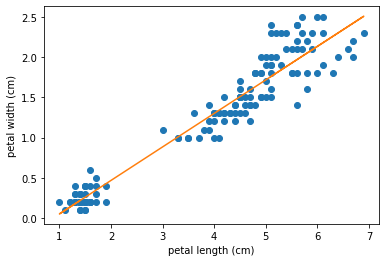

In [20]:
import matplotlib.pyplot as plt

plt.plot(pet_len, pet_wid, 'o')
plt.plot(pet_len, m*pet_len + n)
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

<br>

The linear model follows the equation shown above:

<br>

 $$ 
  \hat y = \beta_0 + \beta_1  x 
 $$

<br>

* $ \beta_1 $ = 0.42
* $ \beta_0 $ = -0.36

<br>

$$ \hat y = 0.42 -0.36 x $$

<br>

How are $ \beta_0 $ and $ \beta_1 $ estimated? In other words how is the line which fits the data best found?

In regression algorithms the aim is to find the model which minimises the loss function. Choosing the apropriate loss function is key in machine learning. In the case of simple linear regression the aim is to find the line which minimises the difference between the predicted values and the true values. 

Let's look at it in this image: 

<br>

![image.png](https://littleml.files.wordpress.com/2019/03/residuals-1.png)

<br>

The difference between the predicted value and the true value is called residual (doted lines). To account for the fact that predictions can be higher and lower than the true value (this is residuals can be positive or negative), a linear model aims to minimise the Residual Sum of Squares (RSS):

<br>

$$ RSS(\beta) = \sum_{i=1}^{N} (\hat y - y)^2 $$

<br>

* $\beta$ = {$\beta_0, \beta_1$... $\beta_n$}
* $N$ = number of data points
* $\hat y$ = predicted value
* $y$ = true value

<br>


For linear regression models, there is a closed-formed solution to compute the optimal coefficient values using the [Normal equation](https://towardsdatascience.com/performing-linear-regression-using-the-normal-equation-6372ed3c57).






### Metrics to evaluate the models

There are different metrics to evaluate the performance of linear regression models.

#### Mean Absolute Error (MAE)

The **Mean Absolute Error** is perhaps the simplest metric. It computes the average absolute difference between predictions and actual values. It therefore follows the formula:

$$ MAE(\beta) = {\frac{1}{N}}\sum_{i=1}^{N} |\hat y - y| $$ 

* $\beta$ = {$\beta_0, \beta_1$... $\beta_n$}
* $N$ = number of data points
* $\hat y$ = predicted value
* $y$ = true value


<br>


In the case of MAE all residuals are weighted equally. For this reason it is not optimal when outliers are present.

The interpretation of this metric relatively straight forward. It indicates the average error of the model (regardless of direction). For example, if a linear regression model which predicts the height (cm) based on the weight (kg) has MAE = 3, it indicates that the model predictions have an average of error ±3 cm.



<br>

#### Root Mean Square Error (RMSE)

The **Root mean square error**  is another common metric to evaluate the performance of machine learning algorithms. It follows the formula:

<br>

$$ RMSE(\beta) =  \sqrt {\frac{1}{N}\sum_{i=1}^{N}(\hat y - y)^2} $$


* $\beta$ = {$\beta_0, \beta_1$... $\beta_n$}
* $N$ = number of data points
* $\hat y$ = predicted value
* $y$ = true value

<br>

Since the differences between predicted and true values are squared, the importance of errors increases quadratically with their value. This means that predictions which are very far from the true values are penalised by RMSE. 

#### Coeficient of determination ($ R^2$)

There are other metrics which evaluate how good the model fits the data. The coefficient of determination or R-squared ($R^2$) is one example. It measures the proportion of total variance of the response variable explained by model. The higher the value the better the model fits the data. It follows the equation:

<br>

$$ R^2 = 1 - \frac {SS_{res}}{SS_{tot}} = 1 - \frac {\sum_{i=1}^{N} (\hat y - y)^2}{\sum_{i=1}^{N}(y - \bar y)^2} $$

* $ \hat y $ =  predicted value
* $ y $ = true value
* $ \bar y $ = mean of response variable
* $ N $ = number of data points

<br>

### Build linear model

Let's now fit a simple linear model to the iris dataset and make predictions. In this case we are interested in predicting the petal width (response variable) using the petal length as predictor variable.


The process has the following steps:

1. Split dataset into training and test set
2. Fit linear model to the training data
3. Apply the model to test set.
4. Evaluate the model performance (MAE, RMSE and $R^2$)

#### Prepare data

In [82]:
# split dataset into training and test set

# set a random seed so that the randomly sampled rows are always the same
import random
random.seed(20)

# sample 20 row numbers to use as test set
rows_test = random.sample(range(0,pet_len.shape[0]),20)

# split predictor variable into test and training set
pet_len_test = pet_len[rows_test]
pet_len_train = np.delete(pet_len, rows_test)[:,np.newaxis]


# split response variable into test and training set
pet_wid_test = pet_wid[rows_test]
pet_wid_train = np.delete(pet_wid, rows_test)[:, np.newaxis]


print("Training set has {} observations and test set has {}".format(pet_len_train.shape[0], pet_len_test.shape[0]))



Training set has 130 observations and test set has 20


In [81]:
np.delete(pet_wid, rows_test)

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1,
       0.2, 0.4, 0.4, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2, 0.3, 0.3, 0.2, 0.4, 0.3,
       0.2, 0.2, 0.2, 0.2, 1.4, 1.5, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. ,
       1.5, 1. , 1.4, 1.3, 1.4, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3,
       1.4, 1.4, 1.7, 1.5, 1. , 1.1, 1.2, 1.5, 1.3, 1.3, 1.3, 1.2, 1.4,
       1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8, 1.7,
       1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 1.8, 2.2, 2.3, 1.5, 2.3,
       2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6, 1.9, 2. , 2.2, 1.5, 1.4,
       2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9, 2.3, 2.5, 2.3, 2. , 1.8])

#### Fit model to training data

Text(0, 0.5, 'petal width (cm)')

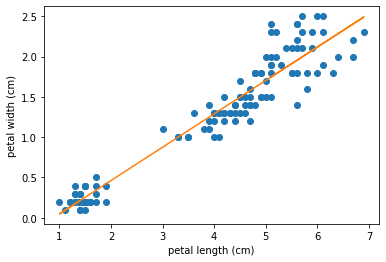

In [83]:
# fit a simple linear regression model to the training set

# create a linear regression object
regres_pet = linear_model.LinearRegression()

# fit a linear model to the training data
regres_pet.fit(pet_len_train, pet_wid_train)

# plot petal length v.s. width and the fitted line to the training set
plt.plot(pet_len_train , pet_wid_train, 'o')
plt.plot(pet_len_train, regres_pet.predict(pet_len_train))
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

#### Predict new values

In [92]:
# make predictions on the test set
pet_wid_pred = regres_pet.predict(pet_len_test)

# create data frame with predicted and true values
pred_table_wid = pd.DataFrame({'Predicted_width': pet_wid_pred.flatten(), 'True_width': pet_wid_test.flatten()})

# print data frame 
pred_table_wid

,Predicted_width,True_width
0,0.172156,0.2
1,1.496697,1.5
2,0.296332,0.2
3,1.745049,1.6
4,1.703657,1.9
5,0.296332,0.6
6,0.213548,0.3
7,2.365927,2.1
8,2.034792,2.2
9,0.254940,0.3


Text(0, 0.5, 'Predicted petal width (cm)')

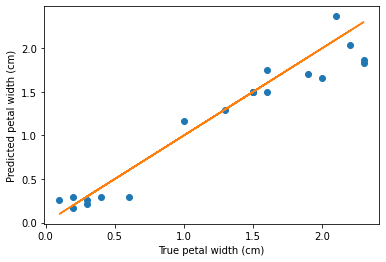

In [100]:
# Make scatter plot of predicted vs true petal width
plt.plot(pet_wid_test, pet_wid_pred, 'o')
plt.plot(pet_wid_test, pet_wid_test)
plt.xlabel('True petal width (cm)')
plt.ylabel('Predicted petal width (cm)')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Residuals')

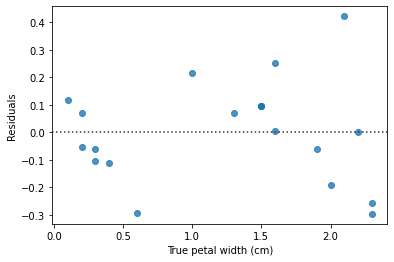

In [104]:
# make residuals plot
sns.residplot(pet_wid_test, pet_wid_pred)
plt.xlabel("True petal width (cm)")
plt.ylabel("Residuals")

#### Evaluate the model

In [105]:
# evaluate the performance of the model

# import metrics package
from sklearn import metrics

# compute MAE
petal_mae = metrics.mean_absolute_error(pet_wid_pred, pet_wid_test)

# get RMSE
petal_rmse = metrics.mean_squared_error(pet_wid_pred, pet_wid_test,
                           squared = False)

print("The model has a MAE = {} (cm) and a RMSE = {} (cm)".format(round(petal_mae, 3), round(petal_rmse, 3)))


The model has a MAE = 0.156 (cm) and a RMSE = 0.208 (cm)


In [89]:
# get squared R 
metrics.r2_score(pet_wid_pred, pet_wid_test)

0.9158130316127013

### Exercise 

Let's now do an exercise. The iris dataset contains two additional variables sepal length and sepal width. How well can we predict the length of sepals using the length of petals? 

1. Fit a linear model to predict sepal length uisng the petal length 
2. Predict the sepal length of a test set using the model
3. Compute the MAE, RMSE and $R^2$.


In [94]:
# the column we are interested now are 0 and 2
iris_table

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


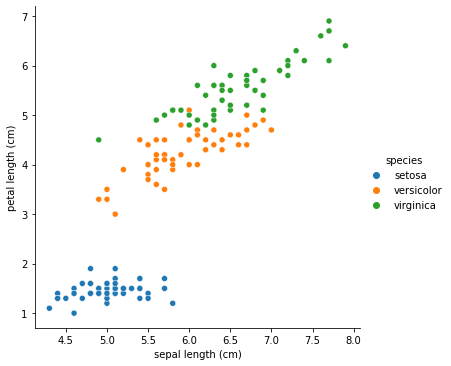

In [93]:
# the relationship seems different for the setosa species
sns.relplot(data = iris_table, x = iris_table.columns[0], y = iris_table.columns[2], hue="species")

In [95]:
# exclude setosa species for the downstream analysis

# get sepal length for versicolor and virginica species
sep_len = iris_table[iris_table.species != "setosa"].iloc[:, 0][:, np.newaxis]

# get petal length for versicolor and virginica species
pet_len_filt = iris_table[iris_table.species != "setosa"].iloc[:,2][:, np.newaxis]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys


#### Solution

Text(0, 0.5, 'Predicted sepal length')

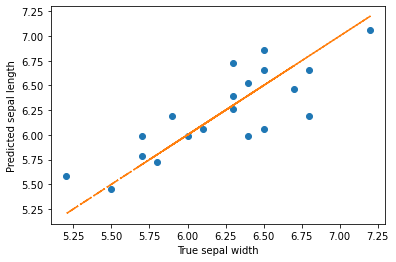

In [172]:
random.seed(10)

# sample 5 row numbers to use as test set
rows_test = random.sample(range(0, sep_len.shape[0]),20)

# split predictor variable into test and training set
sep_len_train = np.delete(sep_len, rows_test)[:,np.newaxis]
sep_len_test = sep_len[rows_test]

# split response variable into test and training set 
pet_len_train = np.delete(pet_len_filt, rows_test)[:, np.newaxis]
pet_len_test = pet_len_filt[rows_test]

# create a linear regression object
regres_sep = linear_model.LinearRegression()

# fit a linear model to the training data
regres_sep.fit(pet_len_train, sep_len_train)

# predict values of test set
sep_len_pred = regres_sep.predict(pet_len_test)

# plot predicted values v.s. true values
plt.plot(sep_len_test, sep_len_pred, 'o')
plt.plot(sep_len_test, sep_len_test, "-.")
plt.xlabel("True sepal width")
plt.ylabel("Predicted sepal length")



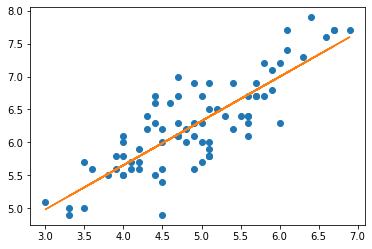

In [117]:
# plot fitted line to training data
plt.plot(pet_len_train, sep_len_train, 'o')
plt.plot(pet_len_train, regres_sep.predict(pet_len_train))

In [118]:
# get MAE 
metrics.mean_absolute_error(sep_len_test, sep_len_pred)

0.2212355038642344

In [119]:
# get RMSE 
metrics.mean_squared_error(sep_len_test, sep_len_pred, squared = False)

0.2769630990972822

In [120]:
# get squared R
metrics.r2_score(sep_len_test, sep_len_pred)

0.6680720109841153

## Multiple linear regression

In many cases we have more than one predictor variable describing the response variable. The same linear regression model can be applied in such cases. In that case there is one additional parameter per additional predictor variable. With these multidimensional data instead of finding the line which best fits the data, the plane (2 predictor variables) or hyperplane (more than 2 predictor variables) is sought.

<br>

$$ \hat y = \beta_0 + \beta_1x_{1} + \beta_2x_{2} ... \beta_nx_{n} $$ 

<br>

* $\hat y $ = predicted value 
* $ \beta_i $ = parameters or coefficients of the model
* $ x_{i} $ = predictor variable  

<br> 

Let's fit a multiple linear regression model to the diabetes dataset. The response variable in this case is termed disase progression.


### Explore dataset

A good idea when prompted with a new dataset is to explore the different independent variables and the response variable. In this case the independent variable is **disase progression**.

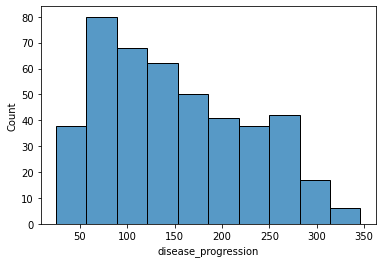

In [121]:
# make histogram of disease progression values
sns.histplot(data = diabetes_table, x = 'disease_progression')

In order to explore the predictive variables the pariplot from the seaborn package is a very handy tool to look at the distribution of values in each variable as well as the possible relationships between them. 

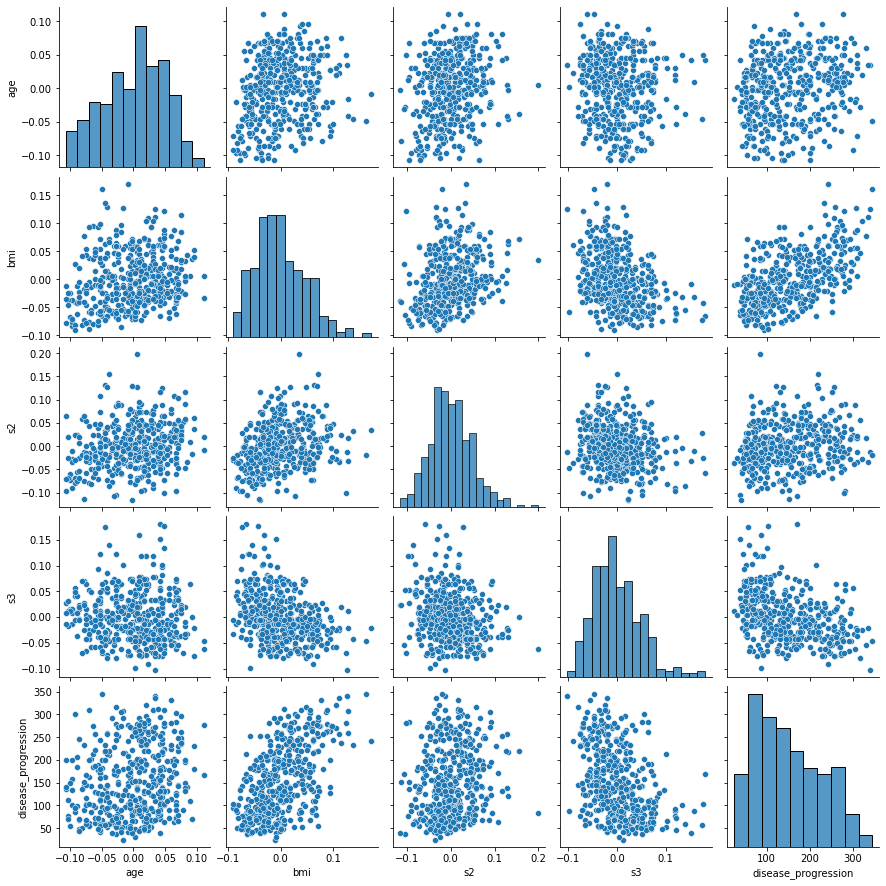

In [127]:
# Since there are a few dependent variables we will only look at a subset of them
sns.pairplot(diabetes_table[['age', 'bmi', 's2', 's3', 'disease_progression']])

### Train model

In [129]:
# split dataset into test and training set
from sklearn.model_selection import train_test_split

# scikit learn includes a function to do so
# we use 80% of the data for training and 20 % as test set
diab_train, diab_test, progr_train, progr_test = train_test_split(diabetes_dataset['data'], diabetes_dataset['target'],
                                                                  test_size = 0.2, random_state = 42)


print("Training set has {} observations and test set has {}".format(diab_train.shape[0], diab_test.shape[0]))


Training set has 353 observations and test set has 89


In [130]:
# create a linear regression object
diab_lin_model = linear_model.LinearRegression()

# fit the linear model to the training data
diab_lin_model = diab_lin_model.fit(diab_train, progr_train)

# predict values of test set
diab_pred = diab_lin_model.predict(diab_test)

# make data frame with predicted and true values
pred_table_diab = pd.DataFrame.from_dict({'Predicted_progression': diab_pred.flatten(), 'True_progression': progr_test.flatten()})

# print data frame 
pred_table_diab

,Predicted_progression,True_progression
0,139.548313,219.0
1,179.520306,70.0
2,134.041333,202.0
3,291.411936,230.0
4,123.787237,111.0
...,...,...
84,115.009746,153.0
85,78.958867,98.0
86,81.557314,37.0
87,54.377478,63.0


Text(0, 0.5, 'Predicted progression(a.u.)')

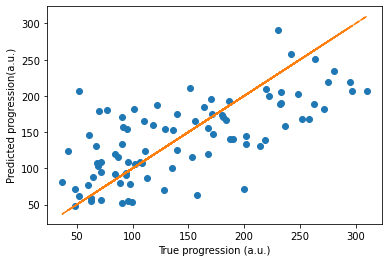

In [131]:
# plot predicted values vs real values
plt.plot(progr_test, diab_pred, 'o')
plt.plot(progr_test, progr_test, "--")
plt.xlabel("True progression (a.u.)")
plt.ylabel("Predicted progression(a.u.)")

In [132]:
# get MAE
diab_mae = metrics.mean_absolute_error(progr_test, diab_pred)

print('The MAE of the model is {}'.format(diab_mae))

The MAE of the model is 42.79389304196525


In [133]:
# get RMSE
diab_rmse = metrics.mean_squared_error(progr_test, diab_pred,
                                       squared = False)

print('The RMSE of the model is {}'.format(diab_rmse))

The RMSE of the model is 53.8532569849144


In [134]:
# get squared R 
diab_rsqr = metrics.r2_score(progr_test, diab_pred)

print('The R^2 of the model is {}'.format(diab_rsqr))

The R^2 of the model is 0.452606602161738


### Exercise
To end this section let's explore the relationship between methylation and age. In the dataset below we can find the methylation levels for 53 CpGs from 100 individuals as well as the corresponding age. The dataset was obtained from [Daunay et al., 2019](https://www.nature.com/articles/s41598-019-45197-w#Sec14). Methylation levels were measured from blood samples using pyrosequencing. 

**Task:** Can we predict the age of the individuals based on the methylation levels using linear regression? How accurate are our predictions? 

**Bonus exercise:** Train a multiple linear regression model on only the 1st 23 methylation sites and compare the performance to the model trained on the complete dataset. Discuss the obtained results.

In [136]:
# load dataset 
age_table = pd.read_csv("https://raw.githubusercontent.com/IvoLeist/ml_cnag-crg_course/main/day2/methylation_dataset.csv")

age_table


,age,C1orf132_CpG2,CCDC102B_CpG1,CCDC102B_CpG2,EDARADD_CpG2,ELOVL2_CpG1,ELOVL2_CpG2,ELOVL2_CpG3,ELOVL2_CpG7,FHL2_CpG1,FHL2_CpG4,FHL2_CpG5,FHL2_CpG6,ITGA2B_CpG1,ITGA2B_CpG2,KLF14_CpG1,KLF14_CpG3,PDE4C_CpG2,PDE4C_CpG3,PDE4C_CpG5,PDE4C_CpG8,ZNF423_CpG1,ZNF423_CpG2,ASPA_CpG1,ASPA_CpG2,C1orf132_CpG1,C1orf132_CpG3,EDARADD_CpG1,ELOVL2_CpG4,ELOVL2_CpG5,ELOVL2_CpG6,FHL2_CpG2,FHL2_CpG3,FHL2_CpG7,FHL2_CpG8,FHL2_CpG9,FHL2_CpG10,ITGA2B_CpG3,KLF14_CpG2,KLF14_CpG4,PDE4C_CpG1,PDE4C_CpG4,PDE4C_CpG6,PDE4C_CpG7,TRIM59_CpG1,TRIM59_CpG2,TRIM59_CpG3,TRIM59_CpG4,TRIM59_CpG5,TRIM59_CpG6,TRIM59_CpG7,TRIM59_CpG8,ZNF423_CpG3
0,19,83.57,47.97,16.90,42.78,27.76,27.29,54.06,52.61,26.93,47.72,23.63,35.74,69.45,71.76,3.62,8.38,28.42,13.78,13.88,9.26,86.11,81.23,83.14,87.22,88.01,82.25,67.87,30.99,18.36,40.76,29.27,31.98,17.68,12.23,28.29,9.63,80.46,1.48,2.27,17.28,13.22,12.23,10.83,22.73,13.56,20.12,37.59,33.71,30.20,31.37,24.35,79.41
1,20,81.19,43.61,20.18,48.37,34.93,33.54,59.63,58.48,26.79,49.21,25.60,34.92,77.77,82.80,4.81,7.83,23.72,13.51,14.30,9.39,81.38,80.04,84.36,88.14,88.57,81.42,67.71,38.99,26.24,46.62,29.57,31.34,17.29,11.44,29.74,10.28,87.30,4.09,3.95,19.59,13.48,14.06,10.62,23.37,14.26,23.88,39.96,34.91,30.66,33.83,25.14,75.29
2,23,81.36,54.15,34.53,39.61,32.33,30.91,61.83,62.90,38.85,56.82,32.99,42.62,67.38,74.13,4.02,7.29,28.32,18.98,18.46,10.36,84.72,79.79,81.67,86.50,88.61,82.14,59.09,43.06,28.08,54.86,39.41,44.05,21.03,15.72,38.72,15.10,80.79,1.24,1.13,21.54,18.50,14.20,12.04,21.48,15.32,21.15,33.99,31.95,29.18,33.19,25.06,76.56
3,25,83.17,37.89,23.11,47.77,39.92,35.61,62.82,60.52,30.13,47.56,26.60,34.74,75.46,81.16,4.47,7.67,29.70,15.57,16.56,13.38,84.21,79.19,78.82,83.00,88.17,83.61,65.38,42.10,28.64,51.28,31.08,34.60,19.12,13.33,31.59,11.87,87.74,1.84,1.96,22.69,16.07,12.83,16.16,17.37,14.32,20.20,35.19,33.55,28.96,32.85,23.39,76.43
4,26,82.18,33.56,24.59,40.56,35.23,32.80,59.40,59.88,31.52,56.99,29.45,39.09,67.15,75.02,5.58,9.11,35.47,16.46,18.14,10.58,79.21,72.84,76.28,78.78,88.01,80.75,62.33,36.62,23.88,50.21,33.70,37.38,20.09,13.70,35.31,10.97,83.53,2.51,1.84,24.55,16.15,16.41,11.18,21.95,16.52,25.36,39.94,36.77,34.34,36.22,27.43,74.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,47,74.56,30.53,21.51,38.45,55.14,51.42,74.92,68.15,45.23,67.16,32.13,54.61,68.32,76.87,7.37,13.11,35.25,19.61,23.38,13.62,80.64,79.82,77.67,81.04,81.77,72.24,52.07,50.97,35.11,71.34,39.05,48.34,20.12,17.76,41.79,14.45,80.61,4.59,3.10,29.27,16.48,14.77,15.66,29.81,20.75,30.94,45.72,43.77,43.60,45.60,35.48,75.18
96,50,69.14,29.57,21.16,37.03,57.06,49.26,76.69,71.15,46.41,68.00,31.92,52.59,59.78,66.64,7.80,12.89,36.10,17.66,17.51,11.95,76.77,73.35,66.79,71.72,77.11,63.51,53.63,55.98,33.14,70.85,40.76,50.60,19.62,16.84,41.13,14.96,75.47,4.05,3.84,27.93,15.31,14.77,12.92,24.10,16.16,26.57,43.99,41.62,40.28,45.50,32.97,69.37
97,51,69.36,26.50,18.89,36.89,58.65,54.64,78.14,75.83,46.96,70.50,36.21,52.98,71.81,78.15,7.85,12.97,35.32,20.53,22.67,13.31,77.61,74.61,76.76,78.91,76.38,67.46,49.80,57.45,38.90,75.28,41.52,51.75,22.27,19.84,43.72,17.44,82.14,4.14,3.68,32.00,16.98,15.83,15.55,27.15,20.17,31.70,46.42,43.04,43.76,48.00,34.86,71.00
98,52,66.25,27.19,14.33,36.35,52.19,48.99,76.87,75.96,44.89,66.00,34.61,50.14,64.08,64.73,6.85,13.23,35.63,17.84,21.06,12.39,73.28,72.98,81.05,84.34,76.20,66.28,51.56,55.05,35.60,74.42,41.00,45.23,21.89,14.50,38.09,11.97,73.90,3.24,3.55,28.83,15.13,14.73,13.87,24.81,17.29,27.38,41.85,41.16,40.35,43.10,34.33,67.81


#### Solution

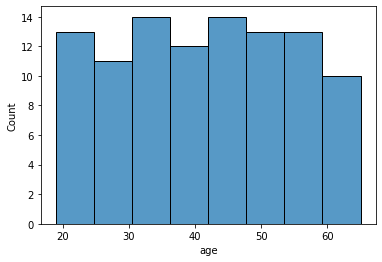

In [139]:
# make histogram of age 
sns.histplot(age_table['age'])

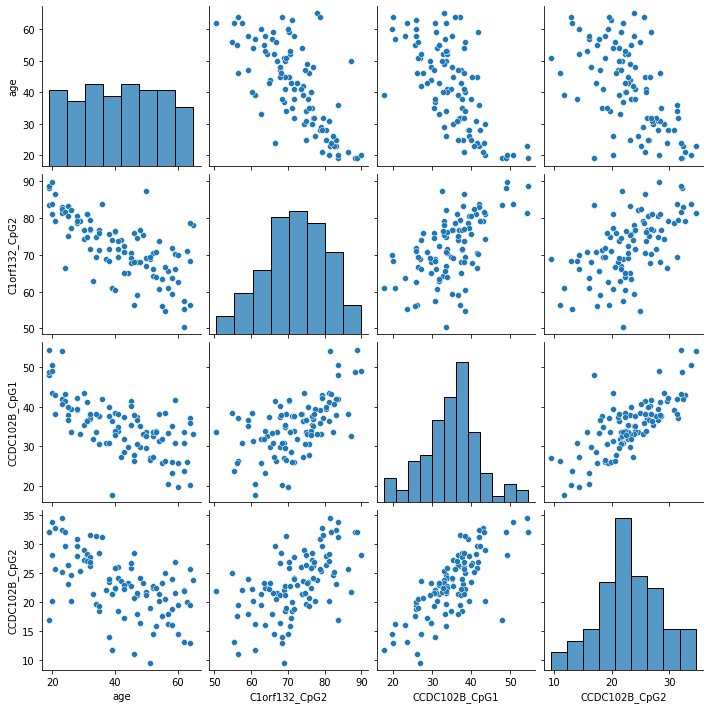

In [140]:
# explore a few of the methylation sites
sns.pairplot(age_table.iloc[:,[0,1,2,3]])

In [171]:
# transform it into an array
meth_array = age_table.to_numpy()

# split dataset into test and training set
meth_train, meth_test, age_train, age_test = train_test_split(meth_array[:,1:99], meth_array[:, 0],
                                                              test_size = 0.2, random_state = 42)

# create a linear regression object
age_lin_model = linear_model.LinearRegression()

# fit the linear model to the training data
age_lin_model = age_lin_model.fit(meth_train, age_train)

# predict values of test set
age_pred = age_lin_model.predict(meth_test)

# make data frame with predicted and true values
pred_table_age = pd.DataFrame.from_dict({'Predicted_age': age_pred.flatten(), 'Chronological_age': age_test.flatten()})

# print data frame 
pred_table_age

,Predicted_age,Chronological_age
0,26.915782,25.0
1,60.171115,58.0
2,32.576195,45.0
3,51.050426,49.0
4,60.883792,48.0
5,50.781928,39.0
6,68.048044,59.0
7,20.685636,21.0
8,35.731515,36.0
9,11.605644,19.0


Text(0, 0.5, 'Predicted age (years)')

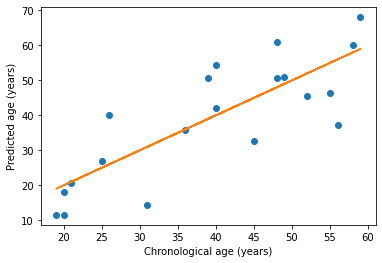

In [142]:
# plot predicted age v.s. chronological age 
plt.plot(age_test ,age_pred, 'o')
plt.plot(age_test, age_test)
plt.xlabel("Chronological age (years)")
plt.ylabel("Predicted age (years)")

In [143]:
# compute MAE 
age_mae = metrics.mean_absolute_error(age_test, age_pred)

# compute RMSE 
age_rmse = metrics.mean_absolute_error(age_test, age_pred)

# compute squared R
age_sqrtr = metrics.r2_score(age_test, age_pred)

In [ ]:
print("The model predicts age with accuracy ±{} years".format(round(age_mae, 2)))

The model predicts age with accuracy ±7.72 years


##### Solution bonus

Let's look at the model performance when we select only a subset of methylation sites (first 23 sites).

In [145]:
# subset the dataframe to take only the 1st 23 sites
age_table_filt = age_table.iloc[:,0:23]

# convert the dataframe to array
meth_array_filt = age_table_filt.to_numpy()

In [146]:
# split dataset into test and training set
meth_filt_train, meth_filt_test, age_filt_train, age_filt_test = train_test_split(meth_array_filt[:,1:99], meth_array_filt[:,0],
                                                                                  test_size = 0.2, random_state = 42)

# create a linear regression object
age_filt_model = linear_model.Lasso()

# fit the linear model to the training data
age_filt_model = age_filt_model.fit(meth_filt_train, age_filt_train)

# predict values of test set
age_pred_filt = age_filt_model.predict(meth_filt_test)

# make data frame with predicted and true values
pred_filt_age = pd.DataFrame.from_dict({'Predicted_age': age_pred_filt.flatten(), 'Chronological_age': age_filt_test.flatten()})

# print data frame 
pred_filt_age

,Predicted_age,Chronological_age
0,22.587532,25.0
1,60.591384,58.0
2,43.676768,45.0
3,47.892470,49.0
4,56.399156,48.0
5,45.277231,39.0
6,63.762561,59.0
7,18.544441,21.0
8,33.790762,36.0
9,14.950625,19.0


In [155]:
# compute MAE 
mae_filt = metrics.mean_absolute_error(age_filt_test, age_pred_filt)

#compute RMSE
rmse_filt = metrics.mean_squared_error(age_filt_test, age_pred_filt, squared = False)

# compute R-squared
sqrt_filt = metrics.r2_score(age_filt_test, age_pred_filt)


Now we can compare the performance of both models looking at MAE, RMSE and R-squared.

In [151]:
# MAE

print("MAE of model with complete dataset: {}".format(age_mae))
print("MAE of model with subseted dataset: {}".format(mae_filt))

MAE of model with complete dataset: 7.722604725343411
MAE of model with subseted dataset: 4.5407078799190135


In [156]:
# RMSE

print("RMSE of model with complete dataset: {}".format(age_rmse))
print("RMSE of model with subseted dataset: {}".format((rmse_filt)))

RMSE of model with complete dataset: 7.722604725343411
RMSE of model with subseted dataset: 5.247178648833993


In [158]:
# Coefficient of determination

print("R-squared of model with complete dataset: {}".format(age_sqrtr))
print("R-squared of model with subseted dataset: {}".format((sqrt_filt)))

R-squared of model with complete dataset: 0.4946214000210306
R-squared of model with subseted dataset: 0.8494051290272016


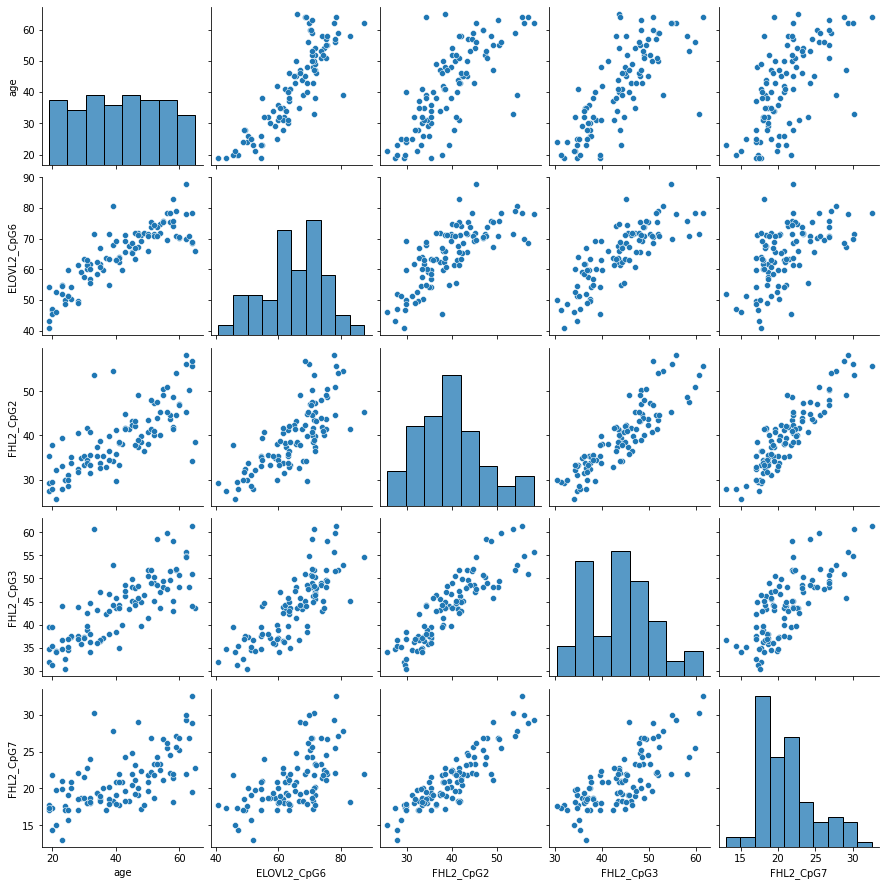

In [162]:
# let's explore the sites which we filtered out
sns.pairplot(age_table.iloc[:,[0, 30, 31,32,33]])

## Problems of linear regression

### Non-linearity of the data

Linear regression models assume that there is a linear relationship between predictor and response variables. When this is not the case linear models can perform poorly. Let's see an example:

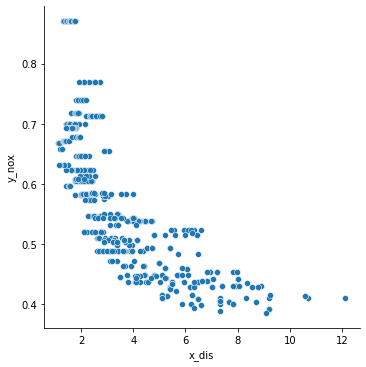

In [164]:
# load boston dataset
boston_dataset = datasets.load_boston()

# get dependent and independent variables as arrays
y_nox = boston_dataset['data'][:, np.newaxis ,4]
x_dis = boston_dataset['data'][:, np.newaxis ,7]

# make dataframe with dependent and independent variable
boston_table = pd.DataFrame.from_dict({'y_nox': y_nox.flatten(),
                                       'x_dis': x_dis.flatten()})

# make scatter plot
sns.relplot(data = boston_table, x = boston_table.columns[1], y = boston_table.columns[0])

#### Residuals plot

Analysing the residual plots can give us an idea about the linear relationship between variables

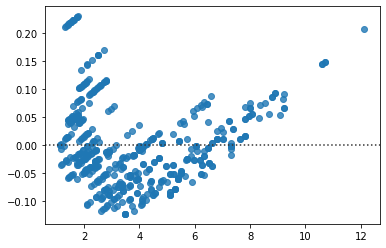

In [165]:
# make residuals plot
sns.residplot(x = x_dis.flatten(), y = y_nox.flatten())

#### Statistical tests for linear association

There are statistical tests which whether the dependent variables have a significant linear relationship with the independent variable.

## Polynomial regression

There are occasions in which the relationship between the dependent and independent variables is not linear. In such cases a linear regression model would not fit the data well. 

Let's see an example:

In [ ]:
bost_lin_model = linear_model.LinearRegression().fit(x_dis, y_nox)

# compute squared R
rsqr_bos_lin = metrics.r2_score(y_nox, bost_lin_model.predict(x_dis))

print('The R^2 of the model is {}'.format(rsqr_bos_lin))

The R^2 of the model is 0.5917149670934201


In [ ]:
# get RMSE
rmse_bos_lin = metrics.mean_squared_error(y_nox, bost_lin_model.predict(x_dis),
                                         squared = False)

print('The RMSE of the model is {}'.format(rmse_bos_lin))

The RMSE of the model is 0.07396937272094305


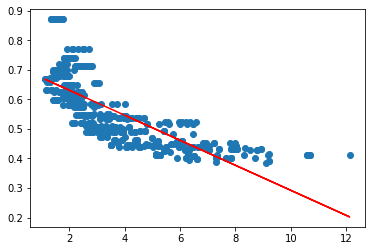

In [ ]:
# make scatter plot with fitted line
plt.plot(x_dis, y_nox, 'o')
plt.plot(x_dis, bost_lin_model.predict(x_dis), 'r')



The following steps are done when carrying out polynomial regression:

1. Generate polynomial features from original features.
2. Fit a linear regression model to the extended feature set.
3. Evalute the fit of the model

<br>

In [166]:
from sklearn.preprocessing import PolynomialFeatures

# generate new features (second degree polynomial)
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
x_dis_poly = poly_features.fit_transform(x_dis)

x_dis_poly[0]


array([ 4.09  , 16.7281])

In [167]:
# fit linear model to extended data
bost_poly_model = linear_model.LinearRegression().fit(x_dis_poly, y_nox)

# compute squared R
rsqr_bos_poly = metrics.r2_score(y_nox, bost_poly_model.predict(x_dis_poly))

print('The R^2 of the model is {}'.format(rsqr_bos_poly))

The R^2 of the model is 0.6998562064647851


In [168]:
# get RMSE
rmse_bos_poly = metrics.mean_squared_error(y_nox, bost_poly_model.predict(x_dis_poly),
                                         squared = False)

print('The RMSE of the model is {}'.format(rmse_bos_poly))

The RMSE of the model is 0.06342126345299987


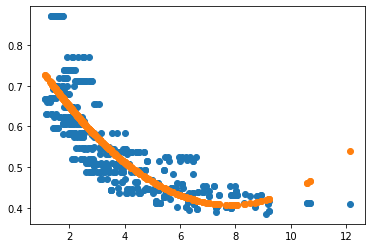

In [169]:
# make scatter plot with predicted and real values
plt.plot(x_dis, y_nox, 'o')
plt.plot(x_dis, bost_poly_model.predict(x_dis_poly), 'o')

In [170]:
# get coefficients from the model 
bost_poly_model.coef_

array([[-0.1116276 ,  0.00713503]])

Since we used a polynomial of degree 2, out model follows the equation:

<br>

$$ \hat y = \beta_0 + \beta_1x_1 + \beta_2x_1^2  $$


# Classification


## Decission Tree

A decision tree is a supervised learning algorithm that is perfect for classification problems, as it’s able to order classes on a precise level. It works like a flow chart, separating data points into two similar categories at a time from the “tree trunk” to “branches,” to “leaves,” where the categories become more finitely similar. This creates categories within categories, allowing for organic classification with limited human supervision.

schematic           |  example
:-------------------------:|:-------------------------:
![image.png](https://miro.medium.com/max/700/1*SKFU4V4qWNDU8sXgq36ncw.png)|![image.png](https://d33wubrfki0l68.cloudfront.net/cb281b80c41c9e76eb327e26ed5e0e6e5f05fc7f/31de9/static/b42ef5448b11ec2f2ec20ca7f97cbb3c/9cda9/decision-tree-sports.png)

**Underlying principle of the algorithm**

It recursively splits the training set till it no longer
finds a split which reduces the impurity

first split|count missclassification
:-------------------------:|:-------------------------:
![image.png](https://miro.medium.com/max/501/0*UvBgln5Di3yeLZHI.png)|![image.png](https://miro.medium.com/max/500/0*NFb_YzdigP99hgjC.png)

Find the missclassification for every split on X1|This is the best split
:-------------------------:|:-------------------------:
![image.png](https://miro.medium.com/max/514/0*NLvKQda-yuqa4Wee.png)|![image.png](https://miro.medium.com/max/491/0*2Hu0AMYGLXqgEMhV.png)

Find the next split | Finished
:-------------------------:|:-------------------------:
![image.png](https://miro.medium.com/max/510/0*zV-l2CROY1ZP_3qA.png)|![image.png](https://miro.medium.com/max/497/0*uGZjGt6N7BRxb46Q.png)

Resulting tree
![image.png](https://miro.medium.com/max/504/0*Z66SWGnP7OqSLuyC.png)


source:
https://towardsdatascience.com/learn-how-decision-trees-are-grown-22bc3d22fb51


Above our cost function we minimized was the number of missclassification
Two other common ones are gini impurity and information gain (entropy)

![image.png](https://miro.medium.com/max/1204/0*Nsuwaq2Padpbdz9Y.png)

It is out of the scope of this course to explain the math behind it
but a takehome message key difference between gini and entropy would be:

Gini: the feature with a lower Gini index is chosen for a split
Entropy: The feature with the largest information gain should is used as the root node

Further read:
https://blog.clairvoyantsoft.com/entropy-information-gain-and-gini-index-the-crux-of-a-decision-tree-99d0cdc699f4
https://towardsdatascience.com/gini-index-vs-information-entropy-7a7e4fed3fcb

##### Load Libraries

In [ ]:
import sys

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

from sklearn.tree import DecisionTreeClassifier,plot_tree

from sklearn.model_selection import train_test_split, \
  GridSearchCV,RandomizedSearchCV

from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from dtreeviz.trees import *

     |████████████████████████████████| 61kB 3.1MB/s 


In [ ]:
#custom functions
from functools import wraps
from time import time
def timeit(func):
    @wraps(func)
    def _time_it(*args, **kwargs):
        start = int(round(time() * 1000))
        try:
            return func(*args, **kwargs)
        finally:
            end_ = int(round(time() * 1000)) - start
            print(f"Total execution time: {end_ if end_ > 0 else 0} ms")
    return _time_it

##### Exploring the breast cancer dataset

In [ ]:
dataset=load_breast_cancer()

print ("daset.data");print()
print("type");print(type(dataset.data)); print()
print("shape");print(dataset.data.shape);print()
print("first 2 rows of the dataset:");print()
dataset.data[:2]

daset.data

type
<class 'numpy.ndarray'>

shape
(569, 30)

first 2 rows of the dataset:



array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02]])

Machine learning terminology

*  row=an observation (also known as: sample,record)
*  column= feature (also known as: predictor, attribute, independent variable)


In [ ]:
print("features:"); print (dataset.feature_names);print()

print("dataset.target")
print("integers representing the diagnosis of each observation");print()
print("shape");print(dataset.target.shape);print()

print("dataset.target_names")
print("encoding scheme for diagnosis: 0 = malignant, 1 = benign")
print(dataset.target_names)

features:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

dataset.target
integers representing the diagnosis of each observation

shape
(569,)

dataset.target_names
encoding scheme for diagnosis: 0 = malignant, 1 = benign
['malignant' 'benign']


In [ ]:
full_df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
full_df["diagnosis"] = dataset.target

code2diagnosis={0:"malignant",1:"benign"}
full_df["diagnosis_name"] = full_df["diagnosis"].map(code2diagnosis)
full_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis,diagnosis_name
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,malignant


Before we doing anything just a short distribution check of benign vs malignant tumors

Number of Benign:  357
Number of Malignant :  212


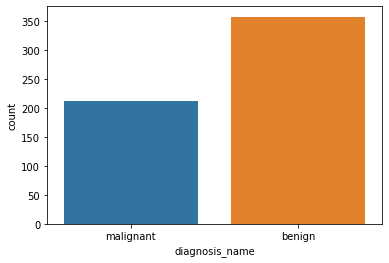

In [ ]:
sns.countplot(x = full_df["diagnosis_name"]) 
B, M = full_df["diagnosis_name"].value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

This is good news. It's always simpler to work on a classification problem when the different classes are equally represented. Here, the count ratio between malignant & benign tumors is close to 0.6, which is acceptable.


#### **Preprocess Data**

So above would now be a really nice "tidy" format which we could use for in depth explanatory analysis. However, since we want to use Machine Learning (i.e. scikit learn) we have to make sure that we fullfill all requirements:

Features and target: 
1. are separate objects
2. should be numeric
3. should be NumPy arrays
4. should have compatible shapes

Luckily in this dataset all the requirements are already fullfilled
So we only need to split the data in training and test set

In [ ]:
# Split dataset into training 80% and test (20%) set
test_size=0.2
x_train, x_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=test_size)

for t in [("training",x_train),("test",x_test)]:
  print(f"observations in the {t[0]} set:{len(t[1])}")

observations in the training set:455
observations in the test set:114


#### Create Decission Tree classifier

In [ ]:
dct_clf = DecisionTreeClassifier(random_state=123456)
dct_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123456, splitter='best')

Tada! We have done it! We have officially trained our decission tree classifier! Now let’s play with it

#### Apply Classifier to Test Data

In [ ]:
# Apply the Classifier we trained to the test data (which, remember, it has never seen before)
targets_predicted=dct_clf.predict(x_test)
targets_predicted

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1])

What are you looking at above? Remember that we coded each of the three species of plant as 0, 1, or 2. What the list of numbers above is showing you is what species our model predicts each plant is based on the the sepal length, sepal width, petal length, and petal width. 

How confident is the classifier about each plant? We can see that too.



In [ ]:
# View the predicted probabilities of the first 5 observations
dct_clf.predict_proba(x_test)[0:5]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

There are three species of plant, thus [ 1. , 0. , 0. ] tells us that the classifier is certain that the plant is the first class.

If you would have for example a row with [ 0., 0.9, 0.1. ]the classifier gives a 90% probability the plant belongs to the 2nd class and a 10% probability the plant belongs to the 3rd class. Because 90 is greater than 10, the classifier would predict the plant is the 2nd class.


In [ ]:
def appply_clf(clf,dataset,x_test,y_test):

  df=pd.DataFrame(x_test, columns=dataset.feature_names)
  df["target"]=y_test
  df["target_predicted"]=clf.predict(x_test)
  return df

test_df=appply_clf(dct_clf,dataset,x_test,y_test)
test_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_predicted
0,13.88,16.16,88.37,596.6,0.07026,0.04831,0.02045,0.008507,0.1607,0.05474,0.2541,0.6218,1.709,23.12,0.003728,0.01415,0.01988,0.007016,0.01647,0.001970,15.51,19.97,99.66,745.3,0.08484,0.1233,0.1091,0.04537,0.2542,0.06623,1,1
1,15.46,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.085200,0.1807,0.07083,0.3331,1.9610,2.937,32.52,0.009538,0.04940,0.06019,0.020410,0.02105,0.006000,17.11,36.33,117.70,909.4,0.17320,0.4967,0.5911,0.21630,0.3013,0.10670,0,0
2,13.21,28.06,84.88,538.4,0.08671,0.06877,0.02987,0.032750,0.1628,0.05781,0.2351,1.5970,1.539,17.85,0.004973,0.01372,0.01498,0.009117,0.01724,0.001343,14.37,37.17,92.48,629.6,0.10720,0.1381,0.1062,0.07958,0.2473,0.06443,1,1
3,14.34,13.47,92.51,641.2,0.09906,0.07624,0.05724,0.046030,0.2075,0.05448,0.5220,0.8121,3.763,48.29,0.007089,0.01428,0.02360,0.012860,0.02266,0.001463,16.77,16.90,110.40,873.2,0.12970,0.1525,0.1632,0.10870,0.3062,0.06072,1,1
4,17.99,20.66,117.80,991.7,0.10360,0.13040,0.12010,0.088240,0.1992,0.06069,0.4537,0.8733,3.061,49.81,0.007231,0.02772,0.02509,0.014800,0.01414,0.003336,21.08,25.41,138.10,1349.0,0.14820,0.3735,0.3301,0.19740,0.3060,0.08503,0,0


That looks pretty good! At least for the first five observations.
So lets do a quick evaluation


In [ ]:
print(f'accuracy:{accuracy_score(y_test, dct_clf.predict(x_test))}')

accuracy:0.9473684210526315


Before we evaluate the classifier further lets explore and try to understand the used classifier

#### Explore the classifier

View Feature Importance

This is in my opinion the most powerful feature of tree based classification models. The importance of each feature can not only help you to understand better how the algorithm comes to its decision but also might give you insights into the underlying biology

In [ ]:
def get_feature_importance(clf,dataset):
  feature_imp = pd.Series(
      clf.feature_importances_,index=dataset.feature_names
      ).sort_values(ascending=False)

  sns.barplot(x=feature_imp, y=feature_imp.index)
  plt.xlabel('Feature Importance Score')
  plt.ylabel('Features')
  plt.title("Visualizing Important Features")
  plt.legend()
  plt.show()

  return (feature_imp)

feature_imp=get_feature_importance(dct_clf,dataset)

ValueError: ignored

So the top 5 most important features in terms of making the split are

In [ ]:
feature_imp[:5]

worst perimeter         0.719805
worst texture           0.084494
worst concave points    0.052923
worst radius            0.036678
compactness error       0.035134
dtype: float64

Lets start with plotting the tree

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


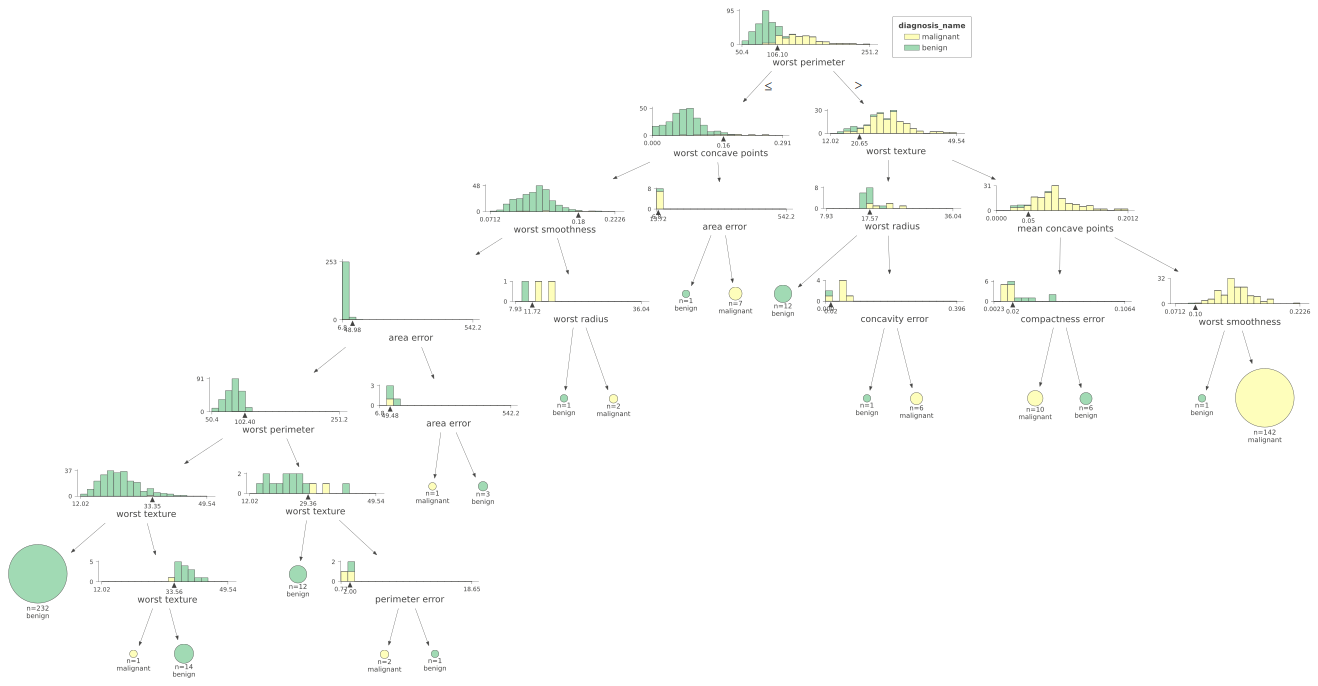

In [ ]:
dtreeviz(dct_clf, x_train,y_train,target_name='diagnosis_name',
         feature_names=dataset.feature_names, 
         class_names=dataset.target_names.tolist())

#### Improve our classifier (by Hyperparameter tuning)

![param vs hyper params](https://editor.analyticsvidhya.com/uploads/67819opt.png)

model parameter is a configuration variable that is internal to the model and whose value can be estimated from data

model hyperparameter is a configuration that is external to the model and whose value cannot be estimated from data.

Above you see a quite "complex" tree lets see if we can simplify it?

`DecisionTreeClassifier` has a lot of configuration options (hyperparams).

|Option |Description|
--- | --- 
|max_depth|How many split will my tree be allowed to do?|
|criterion|loss function to train my tree (entropy/gini)|
|max_features|The number of features to consider when looking for the best split|
|max_leaf_nodes|Limit of how many leaves each split can produce|
|min_samples_leaf|The minimum number of samples required to produce a leaf|
|min_samples_split|Number of samples required in the leaf before splitting|

So it would be quite tedious to test them all on your own.
There are two ways to find the best hyperparams

![grid vs random search](https://miro.medium.com/proxy/1*ZTlQm_WRcrNqL-nLnx6GJA.png)

|Grid |Random|
--- | --- 
|![grid](https://miro.medium.com/max/363/0*4O9P0rwkJGmFr8r6)|![random](https://miro.medium.com/max/363/0*zOI72ajRHAq9W_uU)|
|! **does not scale well** because we try every combination of the set of parameters|we can try a broader range of values or hyperparameters within the same computation time|

Personal suggestion:
start with a randomized search to reduce the parameters space then do a grid search to select the optimal features within this space.




In [ ]:
params = {
    "max_depth"         : [*range(1, 30)],
    "criterion"         : ['entropy', 'gini'],
    "max_features"      : [*range(1, 30)],
    "max_leaf_nodes"    : [*range(1, 30)],
    'min_samples_leaf'  : [*range(1, 30)],
    'min_samples_split' : [*range(1, 30)]
}

@timeit
def search_hyperparams(clf,x,y,params,method):

  if method == "random":
    random_state=123456
    search = RandomizedSearchCV(clf, params, cv=3, random_state=123456,
                                return_train_score=True)

  else:
    search = GridSearchCV(clf, params, cv=3,return_train_score=True)

  search.fit(x,y)
  print(f"{method} - best params")
  print(search.best_params_)
  print()

  df=pd.DataFrame(search.cv_results_["params"])
  df["mean_test_score"]=search.cv_results_["mean_test_score"]
  df=df.sort_values(by='mean_test_score',ascending=False)

  clf2=search.best_estimator_
  clf2.fit(x,y)

  return clf2,df

dct_clf2,cv_df_rnd=search_hyperparams(
    dct_clf,x_train,y_train,params,"random")
cv_df_rnd

#dct_clf2,cv_df_grid=search_hyperparams(dct_clf,x_train,y_train,params,"grid")
#cv_df_grid

random - best params
{'min_samples_split': 16, 'min_samples_leaf': 2, 'max_leaf_nodes': 4, 'max_features': 12, 'max_depth': 26, 'criterion': 'gini'}

Total execution time: 129 ms


,min_samples_split,min_samples_leaf,max_leaf_nodes,max_features,max_depth,criterion,mean_test_score
7,16,2,4,12,26,gini,0.936258
8,19,18,20,28,2,gini,0.912106
1,25,14,25,16,17,gini,0.912092
4,28,22,4,19,11,entropy,0.905513
0,10,26,26,28,12,entropy,0.901083
6,23,25,12,26,23,entropy,0.901083
2,2,28,18,11,17,entropy,0.892311
3,23,26,9,5,12,gini,0.885689
5,22,26,25,5,21,gini,0.885689
9,22,25,18,5,17,gini,0.885689


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


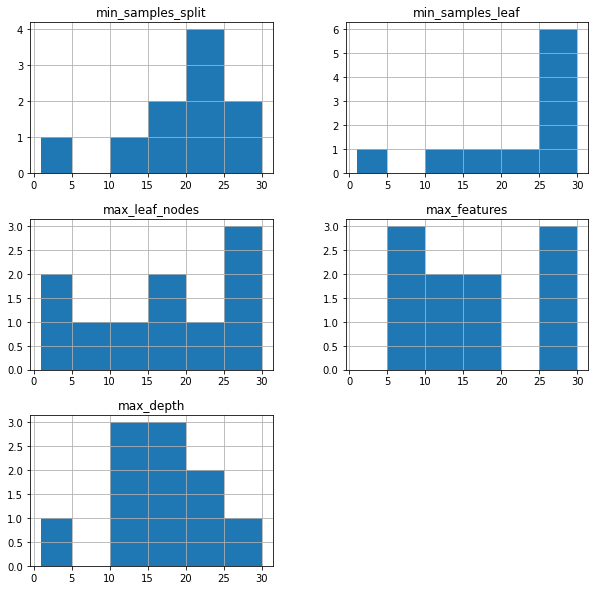

In [ ]:
f,ax = plt.subplots(figsize=(10, 10))
cv_df_rnd=cv_df_rnd.drop(["mean_test_score"],axis=1)
cv_df_rnd.hist(ax=ax,bins=[1,5,10,15,20,25,30])
plt.show()

Based on the plots above and best params we prepare a grid search

In [ ]:
params = {
    "max_depth"         : [10,15,20],
    "criterion"         : ['entropy', 'gini'],
    "max_features"      : [5,10,15,20,30],
    "max_leaf_nodes"    : [2,15,20,30],
    'min_samples_leaf'  : [2,25,30],
    'min_samples_split' : [20,25]}

best_params=dct_clf2.get_params()

for key in best_params:
  if key in params:
    params[key].append(best_params[key])
    params[key]=list(set(params[key]))

print(params)

{'max_depth': [10, 26, 20, 15], 'criterion': ['gini', 'entropy'], 'max_features': [5, 10, 12, 15, 20, 30], 'max_leaf_nodes': [2, 4, 15, 20, 30], 'min_samples_leaf': [25, 2, 30], 'min_samples_split': [16, 25, 20]}


In [ ]:
dct_clf2,cv_df_grid=search_hyperparams(dct_clf,x_train,y_train,params,"grid")
cv_df_grid

grid - best params
{'criterion': 'gini', 'max_depth': 10, 'max_features': 12, 'max_leaf_nodes': 4, 'min_samples_leaf': 2, 'min_samples_split': 16}

Total execution time: 22837 ms


,criterion,max_depth,max_features,max_leaf_nodes,min_samples_leaf,min_samples_split,mean_test_score
372,gini,26,12,4,2,16,0.936258
642,gini,20,12,4,2,16,0.936258
102,gini,10,12,4,2,16,0.936258
912,gini,15,12,4,2,16,0.936258
1463,entropy,26,12,15,2,20,0.936229
...,...,...,...,...,...,...,...
1158,entropy,10,10,20,30,16,0.872502
1154,entropy,10,10,20,25,20,0.872502
1153,entropy,10,10,20,25,25,0.872502
1152,entropy,10,10,20,25,16,0.872502


So lets see how our tree has changed

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


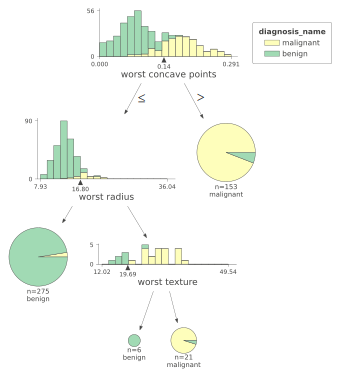

In [ ]:
dtreeviz(dct_clf2, x_train,y_train,target_name='diagnosis_name',
         feature_names=dataset.feature_names, 
         class_names=dataset.target_names.tolist())

Indeed much simpler as our old tree but before we see how this impacts our performance. So again a quick evaluation

In [ ]:
print("accurcacy:")
for t in [("dct_clf",dct_clf),("dct_clf2",dct_clf2)]:
  print(f'{t[0]}:{accuracy_score(y_test, t[1].predict(x_test))}')

accurcacy:
dct_clf:0.9473684210526315
dct_clf2:0.9473684210526315


Only a small dip in performance eventhough having a much simpler tree.
So lets evaluate it in depth

#### Evaluate our classifiers

In [ ]:
def get_clf_performance(name,clf,x_train,y_train,x_test,y_test):
  print(name)
  print("classification report")
  y_test_pred = clf.predict(x_test)
  print(classification_report(y_test, y_test_pred))

for t in [("dct_clf",dct_clf),("dct_clf2",dct_clf2)]:
  get_clf_performance(t[0],t[1],x_train,y_train,x_test,y_test)

dct_clf
classification report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        41
           1       0.96      0.96      0.96        73

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

dct_clf2
classification report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        41
           1       0.97      0.95      0.96        73

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



If you compare this to our classfier in the beginning they perform similar but we managed to greatly simplify it 

However, this doesn’t really tell us anything about where we’re doing well. A useful technique for visualising performance is the confusion matrix.

This is simply a matrix whose diagonal values are true positive counts, while off-diagonal values are false positive and false negative counts for each class against the other.

OK sorry that might have confused you (pun intended ;P)

Hopefully that is more easy

anything on the diagonal was classified correctly and anything off the diagonal was classified incorrectly.


dct_clf


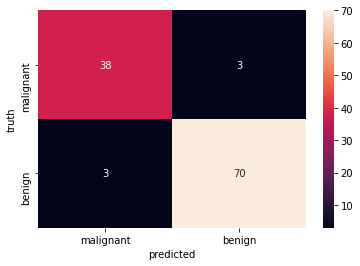

dct_clf2


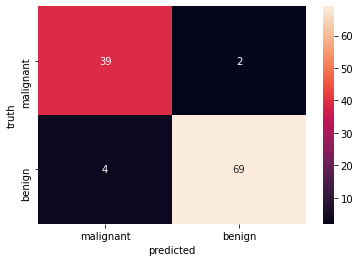

In [ ]:
def get_clf_cm(name,clf,target_names,x_train,y_train,x_test,y_test):
  
  print(name)
  cm = pd.DataFrame(
        confusion_matrix(y_test, clf.predict(x_test)),
        columns=target_names, 
        index=target_names
        )
  sns.heatmap(cm, annot=True)
  plt.xlabel("predicted")
  plt.ylabel("truth")
  plt.show()

for t in [("dct_clf",dct_clf),("dct_clf2",dct_clf2)]:
  get_clf_cm(t[0],t[1],dataset.target_names,x_train,y_train,x_test,y_test)


The initial (but more complex) classifier perfoms in terms of missclassification better but we made it more simple so depending on the use case it might be beneficial to switch to the easier classifier.

For the highly motivated participants:
Fell free to further tune the hyper parameters and let me know when you managed to improve it!

#### Excercise

Apply everything you have learned on the wine dataset.
Feel free to use my mini functions to save some line of codes.
Do not stress about any time limit I just want you to get familiar
with the scikit-learn commands there is no need to finish it.
Just try to get as far as possible ;D

In [ ]:
from sklearn.datasets import load_wine

##### Solution

In [ ]:
from sklearn.datasets import load_wine
dataset = load_wine()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset.data,dataset.target)

wine_clf = DecisionTreeClassifier(random_state=123456)
wine_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123456, splitter='best')

In [ ]:
get_clf_performance("wine_clf",wine_clf,x_train,y_train,x_test,y_test)

wine_clf
classification report
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.88      0.93        16
           2       0.83      0.71      0.77        14

    accuracy                           0.87        45
   macro avg       0.87      0.86      0.86        45
weighted avg       0.88      0.87      0.87        45



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


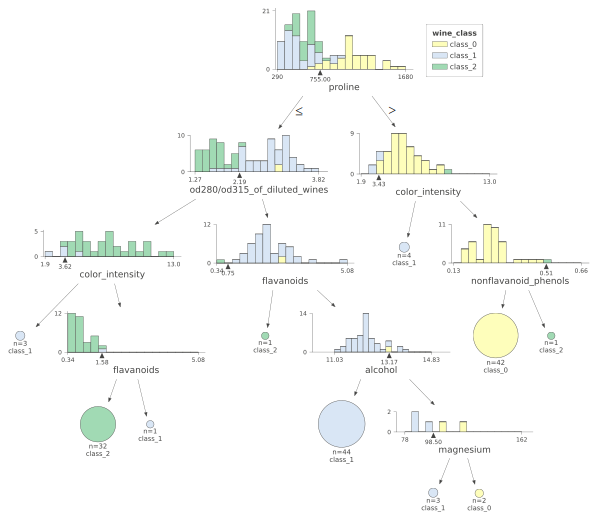

In [ ]:
dtreeviz(wine_clf, x_train,y_train,target_name='wine_class',
         feature_names=dataset.feature_names, 
         class_names=dataset.target_names.tolist())

In [ ]:
test_df=appply_clf(wine_clf,dataset,x_test,y_test)
test_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,target_predicted
0,12.72,1.75,2.28,22.5,84.0,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488.0,1,1
1,13.63,1.81,2.70,17.2,112.0,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310.0,0,0
2,14.06,1.63,2.28,16.0,126.0,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780.0,0,0
3,11.45,2.40,2.42,20.0,96.0,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625.0,1,1
4,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2,0


No handles with labels found to put in legend.


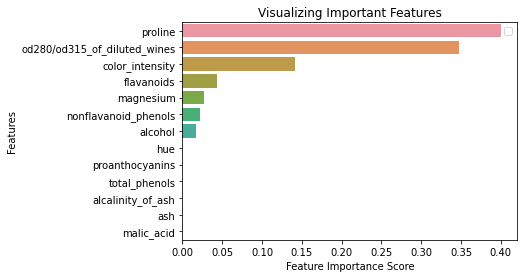

proline                         0.400593
od280/od315_of_diluted_wines    0.347273
color_intensity                 0.141650
flavanoids                      0.043935
magnesium                       0.027584
nonflavanoid_phenols            0.022452
alcohol                         0.016513
hue                             0.000000
proanthocyanins                 0.000000
total_phenols                   0.000000
alcalinity_of_ash               0.000000
ash                             0.000000
malic_acid                      0.000000
dtype: float64

In [ ]:
get_feature_importance(wine_clf,dataset)

In [ ]:
wine_clf2 = DecisionTreeClassifier(random_state=123456)
params = {
    "max_depth"         : [1,2,3,4,5,10],
    "criterion"         : ['entropy', 'gini'],
    "max_features"      : [0.5, 1],
    "max_leaf_nodes"    : [2,3,5],
    'min_samples_leaf'  : [2,3,5],
    'min_samples_split' : [2,3,5]
}
gs = GridSearchCV(wine_clf2, params, cv=3)
gs.fit(x_train, y_train)
print(gs.best_params_)
print()
wine_clf2=gs.best_estimator_
wine_clf2.fit(x_train,y_train)
wine_clf2

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 0.5, 'max_leaf_nodes': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=0.5, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123456, splitter='best')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


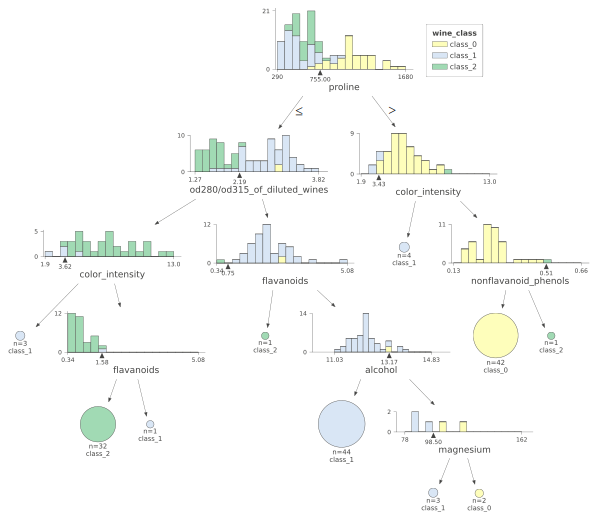

In [ ]:
dtreeviz(wine_clf, x_train,y_train,target_name='wine_class',
         feature_names=dataset.feature_names, 
         class_names=dataset.target_names.tolist())

In [ ]:
for t in [("wine_clf",wine_clf),("wine_clf2",wine_clf2)]:
  get_clf_performance(t[0],t[1],x_train,y_train,x_test,y_test)

wine_clf
classification report
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.88      0.93        16
           2       0.83      0.71      0.77        14

    accuracy                           0.87        45
   macro avg       0.87      0.86      0.86        45
weighted avg       0.88      0.87      0.87        45

wine_clf2
classification report
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        15
           1       1.00      0.94      0.97        16
           2       0.90      0.64      0.75        14

    accuracy                           0.87        45
   macro avg       0.88      0.86      0.86        45
weighted avg       0.89      0.87      0.86        45



wine_clf


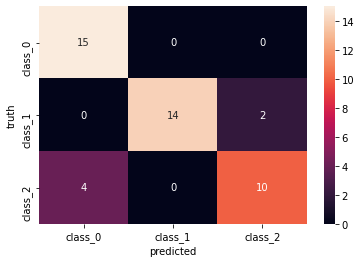

wine_clf2


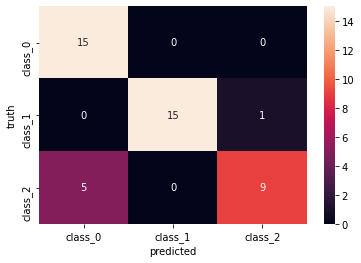

In [ ]:
for t in [("wine_clf",wine_clf),("wine_clf2",wine_clf2)]:
  get_clf_cm(t[0],t[1],dataset.target_names,x_train,y_train,x_test,y_test)

## Random Forest

Random Forest combines the results of many different decision trees to make the best possible decisions.

![image.png](https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png)


#### Load Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

To compare it to our decision tree classifier we take again the breast cancer dataset

In [ ]:
dataset = load_breast_cancer()

#### Preprocess Data

In [ ]:
# Split dataset into training 80% and test (20%) set
test_size=0.2
x_train, x_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=test_size)

for t in [("training",x_train),("test",x_test)]:
  print(f"observations in the {t[0]} set:{len(t[1])}")

observations in the training set:455
observations in the test set:114


#### Create random forest classifier

In [ ]:
num_of_random_trees=100
rf_clf = RandomForestClassifier(
    n_estimators=num_of_random_trees,
    oob_score=True, random_state=123456)

# Train the Classifier
rf_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=123456,
                       verbose=0, warm_start=False)

#### **Apply Classifier To Test Data**


In [ ]:
# View the predicted probabilities of the first 5 observations
for t in [("dct_clf2",dct_clf2),("rf_clf",rf_clf)]:
  print(t[0]);print(t[1].predict_proba(x_test)[0:5]);print()

dct_clf2
[[0.02545455 0.97454545]
 [0.02545455 0.97454545]
 [0.02545455 0.97454545]
 [0.02545455 0.97454545]
 [0.02545455 0.97454545]]

rf_clf
[[0.02 0.98]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]]



In [ ]:
test_df=appply_clf(rf_clf,dataset,x_test,y_test)
test_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_predicted
0,11.14,14.07,71.24,384.6,0.07274,0.06064,0.04505,0.014710,0.1690,0.06083,0.4222,0.8092,3.330,28.84,0.005541,0.033870,0.04505,0.014710,0.03102,0.004831,12.12,15.82,79.62,453.5,0.08864,0.12560,0.12010,0.03922,0.2576,0.07018,1,1
1,12.77,22.47,81.72,506.3,0.09055,0.05761,0.04711,0.027040,0.1585,0.06065,0.2367,1.3800,1.457,19.87,0.007499,0.012020,0.02332,0.008920,0.01647,0.002629,14.49,33.37,92.04,653.6,0.14190,0.15230,0.21770,0.09331,0.2829,0.08067,0,1
2,12.21,18.02,78.31,458.4,0.09231,0.07175,0.04392,0.020270,0.1695,0.05916,0.2527,0.7786,1.874,18.57,0.005833,0.013880,0.02000,0.007087,0.01938,0.001960,14.29,24.04,93.85,624.6,0.13680,0.21700,0.24130,0.08829,0.3218,0.07470,1,1
3,12.34,22.22,79.85,464.5,0.10120,0.10150,0.05370,0.028220,0.1551,0.06761,0.2949,1.6560,1.955,21.55,0.011340,0.031750,0.03125,0.011350,0.01879,0.005348,13.58,28.68,87.36,553.0,0.14520,0.23380,0.16880,0.08194,0.2268,0.09082,1,1
4,12.18,14.08,77.25,461.4,0.07734,0.03212,0.01123,0.005051,0.1673,0.05649,0.2113,0.5996,1.438,15.82,0.005343,0.005767,0.01123,0.005051,0.01977,0.000950,12.85,16.47,81.60,513.1,0.10010,0.05332,0.04116,0.01852,0.2293,0.06037,1,1


Again looks pretty good! At least for the first five observations.
Lets do a quick evaluation and comparison against the decission tree results

In [ ]:
print("accuracy")
for t in [("dct_clf2",dct_clf2),("rf_clf",rf_clf)]:
  print(f'{t[0]}: {accuracy_score(y_test, t[1].predict(x_test))}')

accuracy
dct_clf2: 0.9385964912280702
rf_clf: 0.9210526315789473


This first impression is confirmed by the quite similar accuracy scores

#### Explore the classifier

No handles with labels found to put in legend.


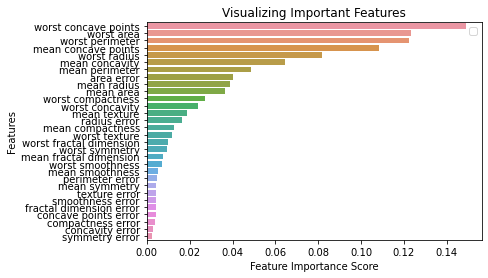

worst concave points       0.148802
worst area                 0.123311
worst perimeter            0.122268
mean concave points        0.108493
worst radius               0.081762
mean concavity             0.064540
mean perimeter             0.048770
area error                 0.040292
mean radius                0.038883
mean area                  0.036373
worst compactness          0.027115
worst concavity            0.023992
mean texture               0.018876
radius error               0.016290
mean compactness           0.012553
worst texture              0.011847
worst fractal dimension    0.010081
worst symmetry             0.009568
mean fractal dimension     0.007414
worst smoothness           0.007080
mean smoothness            0.005374
perimeter error            0.004922
mean symmetry              0.004487
texture error              0.004479
smoothness error           0.004444
fractal dimension error    0.004282
concave points error       0.004170
compactness error          0

In [ ]:
feature_imp=get_feature_importance(rf_clf,dataset)
feature_imp

No surprise for the random forest also worst concave points, worst area...
are the most important features.

#### Improve our classifier

Of course we could also search again for the best parameters but this
time I want to show you the power of feature selection

For this we have to explore the breast cancer set a little bit furter.
However, before we can do this we first have to normalize thes dataset:

In [ ]:
#normalization by standardization
df = full_df.drop(["diagnosis","diagnosis_name"],axis = 1 )
df_normal = (df - df.mean()) / (df.std())
df_normal

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,2.487545,-0.564768,2.830540,2.485391,-0.213814,1.315704,0.723390,0.660239,1.147747,0.906286,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,0.498816,-0.875473,0.263095,0.741749,-0.604819,-0.692317,-0.440393,0.259933,-0.804742,-0.099356,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,1.227596,-0.779398,0.850180,1.180298,-0.296744,0.814257,0.212889,1.423575,0.236827,0.293301,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,0.326087,-0.110312,0.286341,-0.288125,0.689095,2.741868,0.818798,1.114027,4.728520,2.045711,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,1.269426,-0.789549,1.272070,1.189310,1.481763,-0.048477,0.827742,1.143199,-0.360775,0.498889,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,2.779634,0.070963,2.377491,2.601897,1.085429,0.191637,0.665416,2.065360,-1.137415,0.167832,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,1.299356,2.258951,1.155840,1.290429,-0.423637,-0.069697,0.251980,0.807720,-0.188995,-0.490124,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,0.184730,-0.257145,0.276450,0.180539,-0.379008,0.660696,0.510377,0.611619,-0.890632,0.036694,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,1.156917,0.685485,1.437265,1.008615,-0.172848,2.015943,1.301140,0.785031,0.326346,0.903262,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


Now we could do for example a violin plot to see which features might be especial usefule to distinguish between malignant and benign

![violin](https://miro.medium.com/max/520/1*TTMOaNG1o4PgQd-e8LurMg.png)

violin plot = combination of the box plot with a kernel density plot. 

The main advantage of the violin plot over the box plot is that it on top shows the entire distribution of the data. 

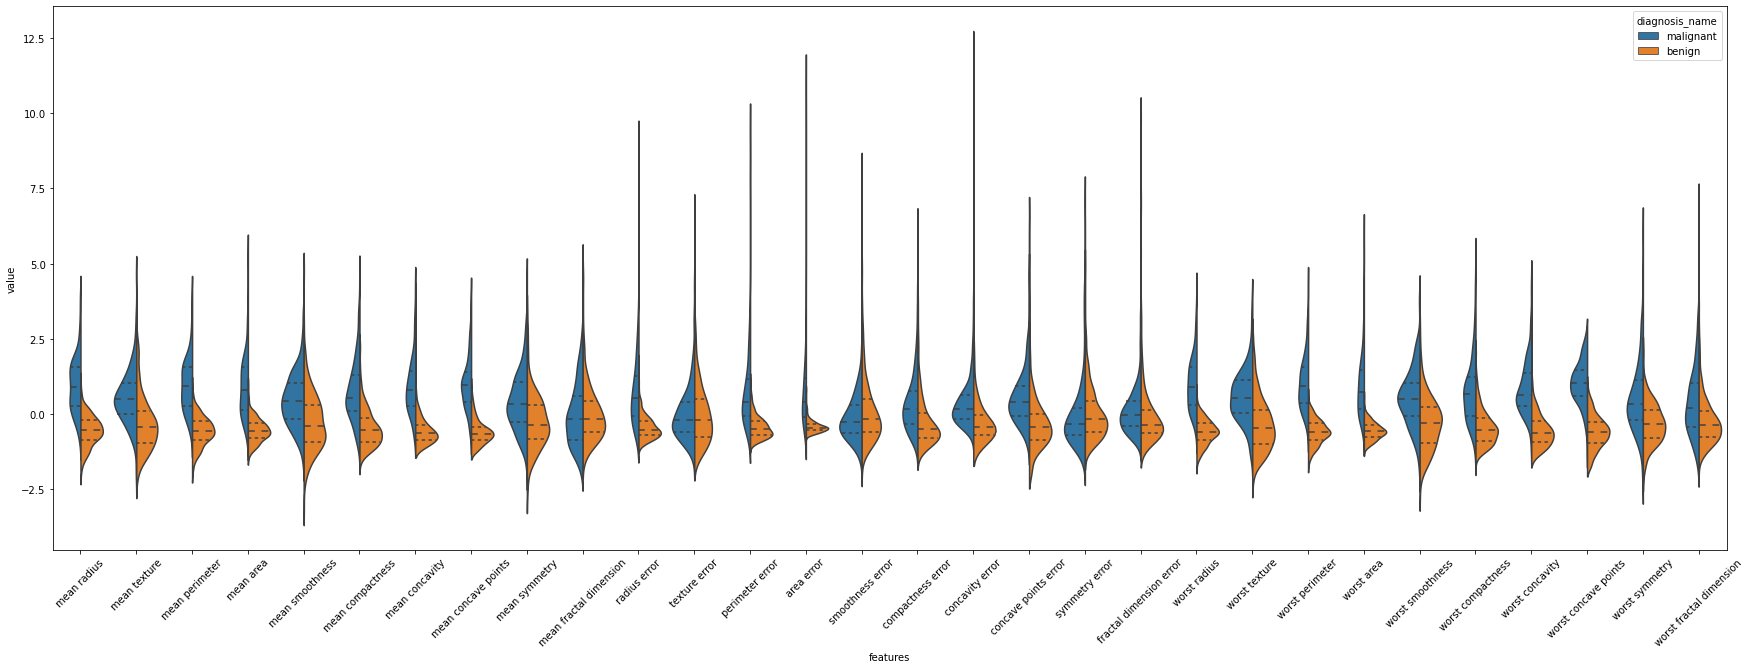

In [ ]:
def violin_plot(target,df):
    data = pd.concat([target,df],axis=1)
    data = pd.melt(data, id_vars="diagnosis_name", 
                   var_name="features", value_name='value')
    plt.figure(figsize=(30,10))
    sns.violinplot(x="features", y="value", hue="diagnosis_name", 
                   data=data, split=True, inner="quart")
    plt.xticks(rotation=45)

violin_plot(full_df["diagnosis_name"],df_normal)

In fact, there is a good separation between several features like e.g.
mean radius, mean perimeter etc., as the third quartile of benign tumors is below the first quartile of malignant tumors.

On top you could also observe that some violin plots look similar to each other
like e.g. worst radius and worst perimeter.
This could indicate that these two features are correlated.

In order to test this you can do a joint plot

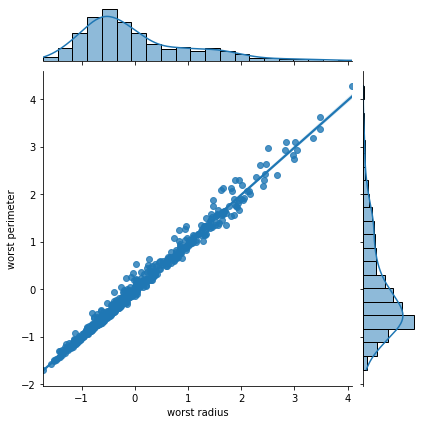

In [ ]:
sns.jointplot(data=df_normal,x="worst radius",y="worst perimeter",kind="reg")
plt.show()

indeed these two are strongly correlated so you could drop one these features

To check for other existing correllations we can use the heatmap function of seaborn (see below)

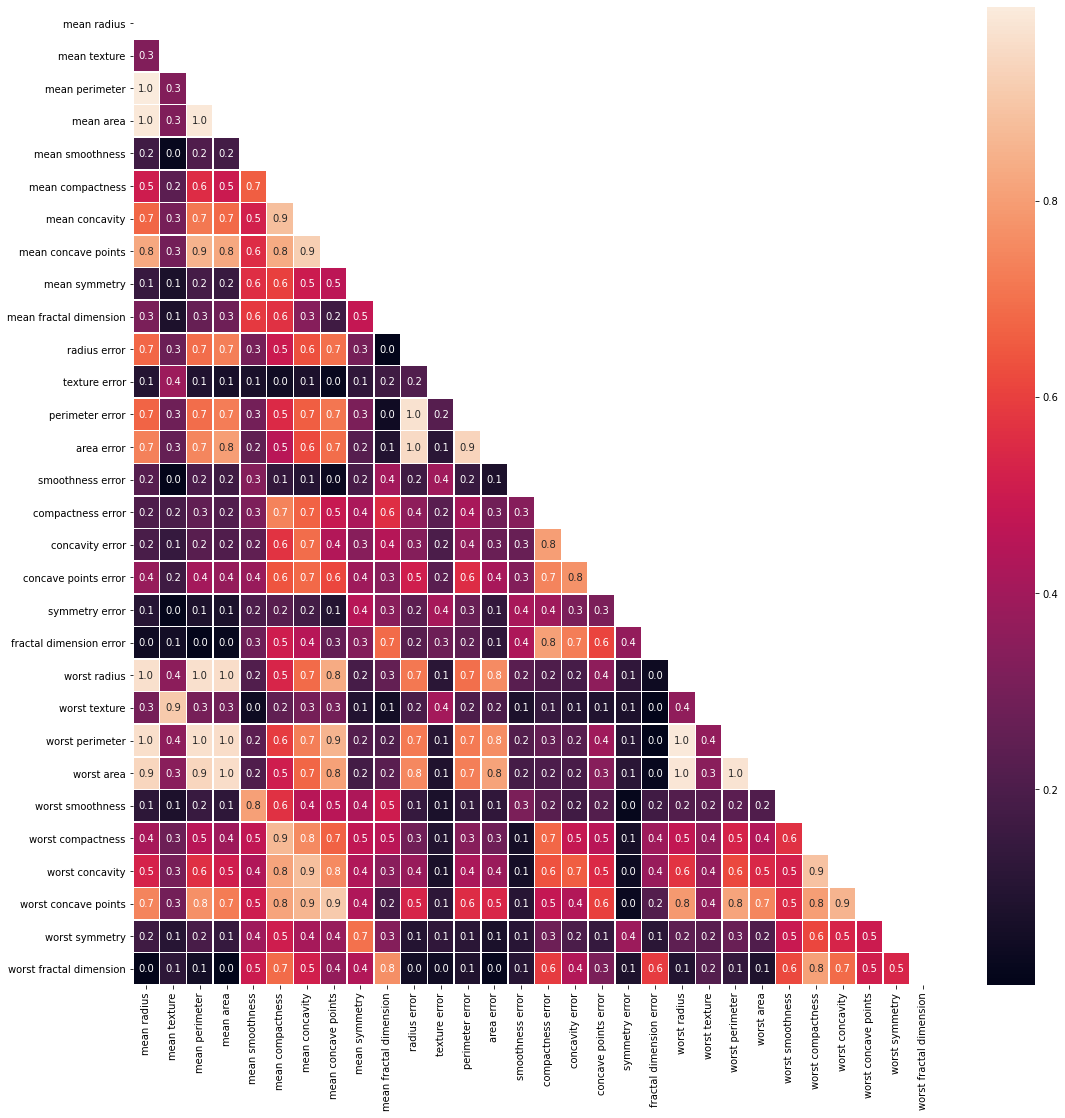

In [ ]:
def plot_corr(df,figsize):
  f,ax = plt.subplots(figsize=figsize)
  corr=df.corr().abs()
  
  #mask for the upper triangle
  mask = np.triu(np.ones_like(corr, dtype=bool))
  sns.heatmap(corr,mask=mask,linewidths=.5, fmt= '.1f', annot=True)
  plt.show()


plot_corr(df_normal,figsize=(18,18))

You could use this matrix to find the highly correlating features by hand
or you can make your life more easy by extracting the highly correlated features programmatically

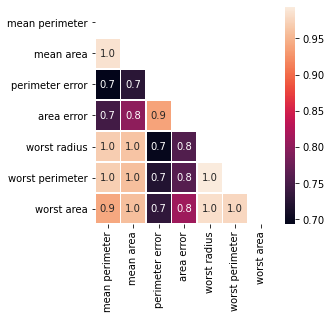

In [ ]:
def extract_high_corr(corr,cutoff):
  #https://www.dezyre.com/recipes/drop-out-highly-correlated-features-in-python
  upper_triangular = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
  high_corr = [c for c in upper_triangular.columns if 
               any(upper_triangular[c] > cutoff)]

  return high_corr
  print(); print(high_corr)

high_corr=extract_high_corr(corr,0.95)
high_corr

plot_corr(df_normal[high_corr],figsize=(4,4))

In the corrplot above it would now be easy to figure out what is correlating with what. You can now do an educated guess (based on your biology knowledge)
which features can be replaced by what e.g.

worst radius, worst perimeter and worst area -> I choose area_worst

or you could take the feature with the highes feature importance as an replacement

In [ ]:

feature_imp[["worst radius","worst perimeter","worst area"]].sort_values(ascending=False)

worst area         0.123311
worst perimeter    0.122268
worst radius       0.081762
dtype: float64

In [ ]:
# Create a selector object that will use our classifier to identify
# features that have an importance of more than 0.04
sfm = SelectFromModel(rf_clf, threshold=0.04)

# Train the selector
sfm.fit(x_train, y_train)

for feature_list_index in sfm.get_support(indices=True):
    print(dataset.feature_names[feature_list_index])

mean perimeter
mean area
mean concavity
mean concave points
area error
worst radius
worst perimeter
worst area
worst concave points


In  theory you could just give it a go with the most important features but 


Create A Data Subset With Only The Most Important Features

In [ ]:
x_important_train = sfm.transform(x_train)
x_important_test = sfm.transform(x_test)

Train A New Random Forest Classifier Using Only Most Important Features

In [ ]:
# Create a new random forest classifier for the most important features
rf_clf2 = RandomForestClassifier(random_state=123456)

# Train the new classifier on the new dataset containing the most important features
rf_clf2.fit(x_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123456,
                       verbose=0, warm_start=False)

In [ ]:
print("accurcacy")
for t in [("dct_clf2",dct_clf2),("rf_clf",rf_clf)]:
  print(f'{t[0]}: {accuracy_score(y_test, t[1].predict(x_test))}')

print(f'rf_clf2:{accuracy_score(y_test, rf_clf2.predict(x_important_test))}')

accurcacy
dct_clf2: 0.9473684210526315
rf_clf: 0.9473684210526315
rf_clf2:0.9473684210526315


As expected our original model which contained all four features performs
slightly better then our feature selected model. So for a small cost in accuracy we halved the number of features in the model

#### **Evaluate our classifiers**

In [ ]:
for t in [("dct_clf2",dct_clf2),("rf_clf",rf_clf)]:
  get_clf_performance(t[0],t[1],x_train,y_train,x_test,y_test)

get_clf_performance(
    "rf_clf2",rf_clf2,x_important_train,y_train,x_important_test,y_test)

dct_clf2
classification report
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        40
           1       0.95      0.97      0.96        74

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

rf_clf
classification report
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        40
           1       0.95      0.97      0.96        74

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

rf_clf2
classification report
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        40
           1       0.97      0.95      0.96        74

    accuracy                           0.95       114
   macro avg       0.94      0.95     

Performance stats look promising but better evaluate it in action!

dct_clf2


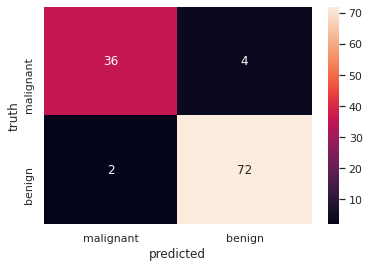

rf_clf


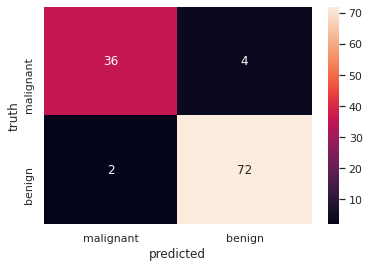

rf_clf2


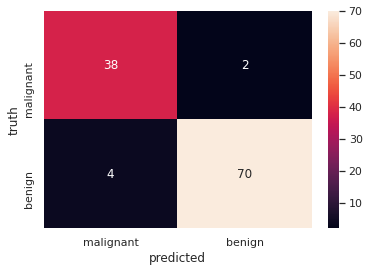

In [ ]:
for t in [("dct_clf2",dct_clf2),("rf_clf",rf_clf)]:
  get_clf_cm(t[0],t[1],dataset.target_names,x_train,y_train,x_test,y_test)

get_clf_cm(
    "rf_clf2",rf_clf2,dataset.target_names,
    x_important_train,y_train,x_important_test,y_test)

#### Exercise

Lets dig deeper into feature selection using a more "complex" dataset

In [ ]:
#https://www.kaggle.com/quantumofronron/breast-cancer-data-set-feature-selection

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

### Solution

In [ ]:
TEST_SIZE_RATIO = 0.5  # split into 2 equally sized train and test sets

# Setup X and y
X = df_all
y = pd.Series(li_target)

X_train_0, X_test_0, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_RATIO, random_state=0)
print("X_train_0.shape, y_train.shape", X_train_0.shape, y_train.shape)
print("X_test_0.shape, y_test.shape", X_test_0.shape, y_test.shape)

X_train_0.shape, y_train.shape (284, 30) (284,)
X_test_0.shape, y_test.shape (285, 30) (285,)


Function correlation_matrix: X.shape, y.shape, yX.shape: (284, 30) (284,) (284, 31)



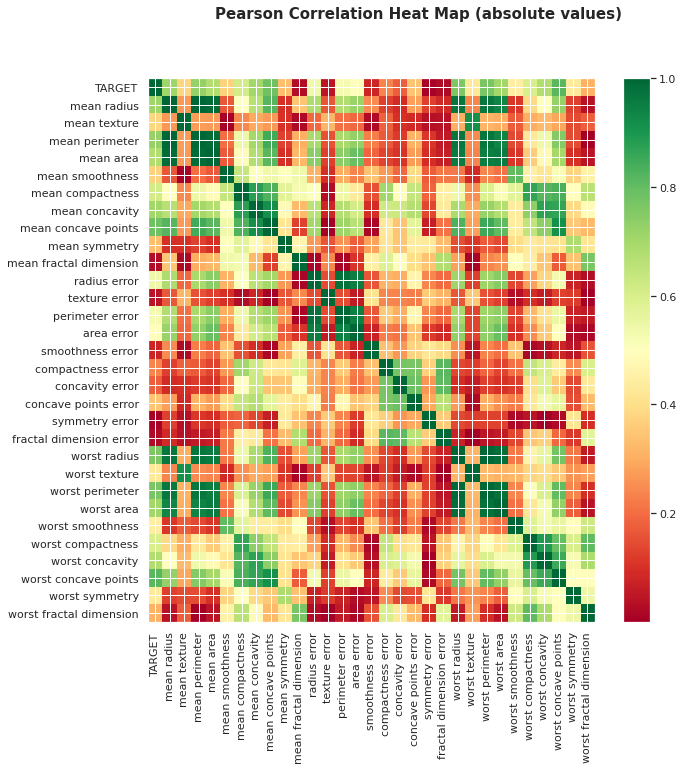

In [ ]:
def correlation_matrix(y, X, is_plot=False):
  # Calculate and plot the correlation symmetrical matrix
  # Return:
  # yX - concatenated data
  # yX_corr - correlation matrix, pearson correlation of values from -1 to +1
  # yX_abs_corr - correlation matrix, absolute values
  
  yX = pd.concat([y, X], axis=1)
  yX = yX.rename(columns={0: 'TARGET'})  # rename first column

  print("Function correlation_matrix: X.shape, y.shape, yX.shape:", X.shape, y.shape, yX.shape)
  print()

  # Get feature correlations and transform to dataframe
  yX_corr = yX.corr(method='pearson')

  # Convert to abolute values
  yX_abs_corr = np.abs(yX_corr) 
  
  if is_plot:
    plt.figure(figsize=(10, 10))
    plt.imshow(yX_abs_corr, cmap='RdYlGn', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(yX_abs_corr)), yX_abs_corr.columns, rotation='vertical')
    plt.yticks(range(len(yX_abs_corr)), yX_abs_corr.columns);
    plt.suptitle('Pearson Correlation Heat Map (absolute values)', fontsize=15, fontweight='bold')
    plt.show()
  
  return yX, yX_corr, yX_abs_corr

# Build the correlation matrix for the train data
yX, yX_corr, yX_abs_corr = correlation_matrix(y_train, X_train_0, is_plot=True)  

###### Solution

In [ ]:
rf_clf3 = RandomForestClassifier(random_state=123456,n_estimators=100)
params = {
    "max_depth": [1,2,3,4,5,10],
    "criterion": ['entropy', 'gini'],
    "max_features": [0.5, 1],
    "max_leaf_nodes": [2,3,5],
    'min_samples_leaf': [2,3,5],
    'min_samples_split': [2,3,5]
}
gs = GridSearchCV(rf_clf3, params, cv=3)
gs.fit(x_important_train, y_train)
print(gs.best_params_)
print()
rf_clf3=gs.best_estimator_
rf_clf3.fit(x_important_train,y_train)
rf_clf3

KeyboardInterrupt: ignored

In [ ]:
for t in [("rf_clf2",rf_clf2),("rf_clf3",rf_clf3)]:
  get_clf_performance(
      t[0],t[1],x_important_train,y_train,x_important_test,y_test)

rf_clf3


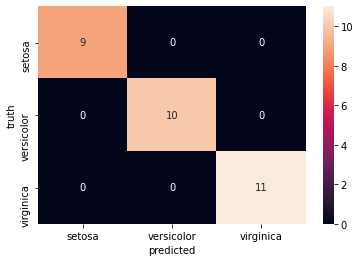

In [ ]:
get_clf_cm("rf_clf3",rf_clf3,iris.target_names,
           x_important_train,y_train,x_important_test,y_test)

## Support Vector Machines

A support vector machine (SVM) uses algorithms to train and classify data within degrees of polarity, taking it to a degree beyond X/Y prediction. 

For a simple visual explanation, we’ll use two tags: red and green, with two data features: X and Y, then train our classifier to output an X/Y coordinate as either red or green.


# ![image.png](https://miro.medium.com/max/724/0*INqwwHXgTabQx7wM.png)

#### Load Libraries

In [ ]:
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

#### generate a random dataset

In [ ]:
def generate_random_list(seed):
    lst=[]
    for t in seed:
      start,end,ndigits=t
      lst.append(round(random.uniform(start,end),ndigits))
    return lst

def generate_random_dataset(size):
    # taken from
    #https://towardsdatascience.com/support-vector-machines-explained-with-python-examples-cb65e8172c85
    seed_x = [(0,2.5,1),(1,5,2),(3,5,2)]
    seed_y = [(0,20,1),(20,25,2),(5,25,2)]
    x,y,target = [],[],[]
    for i in range(size):
      x.extend(generate_random_list(seed_x))
      y.extend(generate_random_list(seed_y))
      target.extend([0,1,1])

    df = pd.DataFrame(list(zip(x,y,target)),columns=['x', 'y','target'])
    return df

# Generate dataset
dataset_size = 100
df = generate_random_dataset(dataset_size)
features = df[['x', 'y']].to_numpy()
label = df['target'].to_numpy()
target_names = np.unique(label)

print("generated dataset")
df.head()

generated dataset


,x,y,target
0,0.90,0.70,0
1,1.01,22.32,1
2,3.72,16.38,1
3,1.90,15.50,0
4,3.97,22.54,1


In [ ]:
# Split dataset into training (80%) and testing (20%) set
x_train, x_test, y_train, y_test = train_test_split(
    features, label, test_size=0.2)

for t in [("training",x_train),("test",x_test)]:
  print(f"observations in the {t[0]} set:{len(t[1])}")

observations in the training set:240
observations in the test set:60


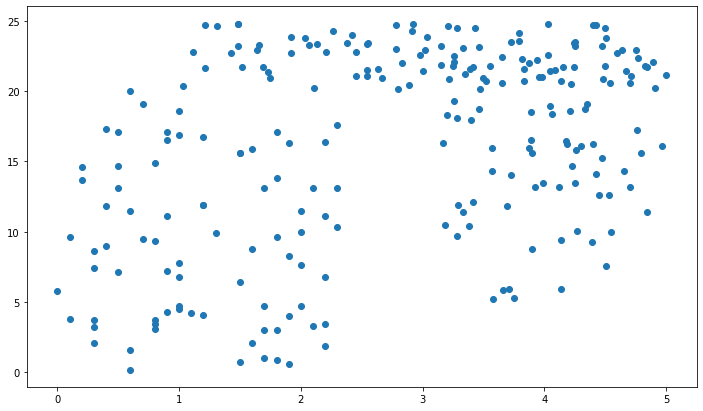

In [ ]:
# Plotting the training set
fig, ax = plt.subplots(figsize=(12, 7))
ax.scatter(x_train[:,0],x_train[:,1])
plt.show()

There’s a little space between the two groups of data points. But closer to the center, it’s not clear which data point belongs to which class.

#### Fit a linear SVM

A linear curve might be a good candidate to separate these classes. So let’s fit the SVM 

In [ ]:
svm_lin_clf = svm.SVC(kernel='linear',random_state=123456)
svm_lin_clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=123456, shrinking=True,
    tol=0.001, verbose=False)

Dataset after classification, with decision boundary (full line)
margin (dashed lines) and support vectors marked with a circle.


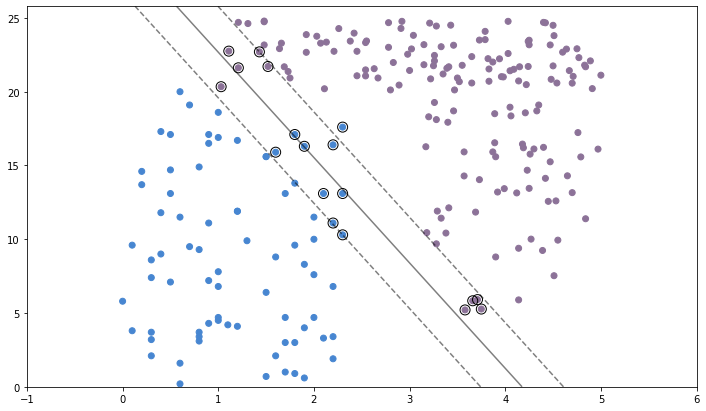

In [ ]:
def plot_decision_boundaries(clf,features,x_train,y_train):
  fig, ax = plt.subplots(figsize=(12, 7))
  
  # Create grid to evaluate classifier
  xx = np.linspace(-1, max(features[:,0]) + 1, len(x_train))
  yy = np.linspace(0, max(features[:,1]) + 1, len(y_train))
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  
  # Assigning different colors to the classes
  colors = np.where(y_train == 1, '#8C7298', '#4786D1')
  
  # Plot the dataset
  ax.scatter(
      x_train[:,0],
      x_train[:,1],
      c=colors)
  
  # Get the separating hyperplane
  Z = clf.decision_function(xy).reshape(XX.shape)
  
  # Draw the decision boundary and margins
  ax.contour(XX, YY, Z, colors='k', 
             levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
  
  # Highlight support vectors with a circle around them
  ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
             s=100, linewidth=1, facecolors='none', edgecolors='k')
  
  print("Dataset after classification, with decision boundary (full line)")
  print("margin (dashed lines) and support vectors marked with a circle.")
  plt.show()

plot_decision_boundaries(svm_lin_clf,features,x_train,y_train)

If we calculate the accuracy of this model against the testing set we get a good result, granted the dataset is very small and generated at random.

In [ ]:
print(f'accuracy: {accuracy_score(y_test, svm_lin_clf.predict(x_test))}')

accuracy: 0.9166666666666666


svm_lin_clf


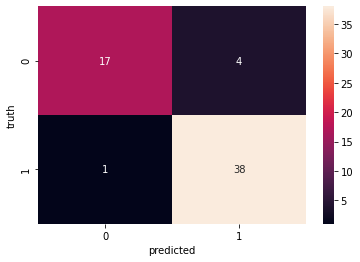

In [ ]:
get_clf_cm("svm_lin_clf",svm_lin_clf,target_names,x_train,y_train,x_test,y_test)

#### Fit a quadratic SVM

The accuracy is good, but let's see if a more complex approach can return an even better result. To fit an SVM with a polynomial kernel we just need to update the kernel parameter.

In [ ]:
svm_poly_clf = svm.SVC(kernel='poly', degree=2,random_state=123456)
svm_poly_clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=123456, shrinking=True,
    tol=0.001, verbose=False)

Dataset after classification, with decision boundary (full line)
margin (dashed lines) and support vectors marked with a circle.


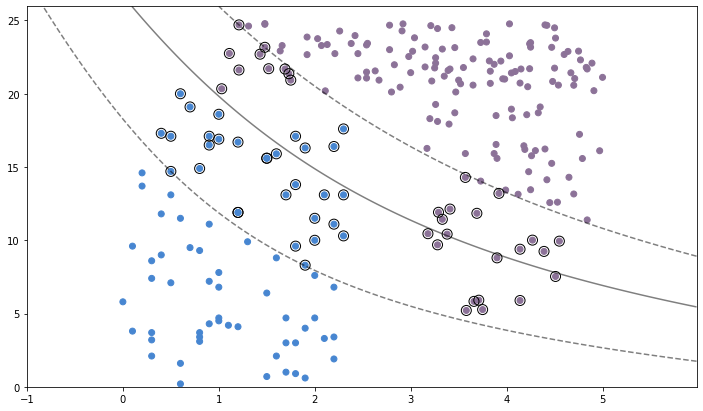

In [ ]:
plot_decision_boundaries(svm_poly_clf,features,x_train,y_train)

In [ ]:
print("accuracy")
for t in [("svm_lin_clf",svm_lin_clf),("svm_poly_clf",svm_poly_clf)]:
  print(f'{t[0]}: {accuracy_score(y_test, t[1].predict(x_test))}')

accuracy
svm_lin_clf: 0.9166666666666666
svm_poly_clf: 0.8333333333333334


So it turns out that for this problem a simpler model, an SVM with a linear kernel, was the best solution.

svm_lin_clf


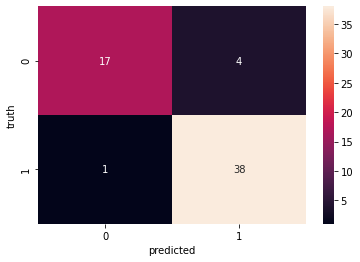

svm_poly_clf


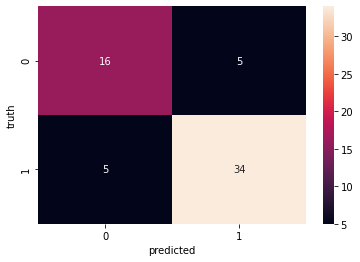

In [ ]:
for t in [("svm_lin_clf",svm_lin_clf),("svm_poly_clf",svm_poly_clf)]:
  get_clf_cm(t[0],t[1],target_names,x_train,y_train,x_test,y_test)

### Exercise

Ok that was easy because we only did a binary classification lets
try our best again with our beloved iris dataset

Maybe this is better:
https://towardsdatascience.com/building-a-simple-machine-learning-model-on-breast-cancer-data-eca4b3b99fa3



###### Solution

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target)

iris_clf = svm.SVC(kernel='linear')
iris_clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
test_df=appply_clf(iris_clf,iris,x_test,y_test)
test_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_predicted
0,5.5,2.5,4.0,1.3,1,1
1,5.7,2.5,5.0,2.0,2,2
2,7.4,2.8,6.1,1.9,2,2
3,4.4,3.0,1.3,0.2,0,0
4,6.3,3.3,4.7,1.6,1,1


In [ ]:
accuracy = accuracy_score(y_test, iris_clf.predict(x_test))
print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.974


iris_clf


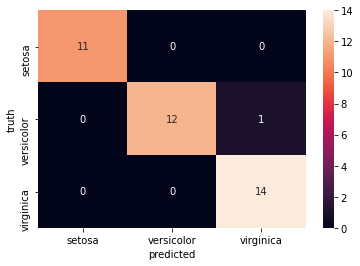

In [ ]:
get_clf_cm("iris_clf",iris_clf,iris.target_names,x_train,y_train,x_test,y_test)

In [ ]:
get_clf_performance("iris_clf",iris_clf,x_train,y_train,x_test,y_test)

iris_clf
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.97        14

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.98        38
weighted avg       0.98      0.97      0.97        38



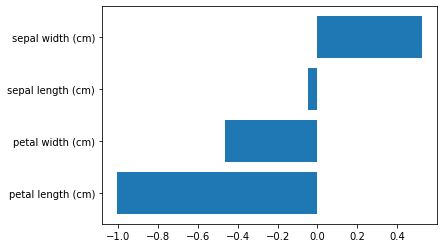

In [ ]:
#Bonus: Feature importance
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names):
    imp,names = zip(*sorted(zip(coef,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

f_importances(iris_clf.coef_[0], iris.feature_names)

Note:
Getting the feature importance in a non-linear SVM is impossible:

In linear SVM the resulting separating plane is in the same space as your input features. Therefore its coefficients can be viewed as weights of the input's "dimensions".

In other kernels, the separating plane exists in another space - a result of kernel transformation of the original space. Its coefficients are not directly related to the input space